In [3]:
%matplotlib inline
import matplotlib
import seaborn as sns
import pandas as pd
import numpy as np
matplotlib.rcParams['savefig.dpi'] = 144

In [3]:
import expectexception

ModuleNotFoundError: No module named 'expectexception'

### Pandas

We introduced the Pandas module and the DataFrame object in the lesson on basic data science modules. We learned how to construct a DataFrame, add data, retrieve data, and basic reading and writing to disc. Now we'll explore the DataFrame object and its powerful analysis methods in moredebth.

We'll work with a data set from the online review site, Yelp. The file is stored as a compressed JSON file.

In [66]:
import json
import gzip

# with open('./data/yelp_data.json', 'r') as f:
#     #yelp = json.dump(f)
#     yelp_data = [line for line in json.load(f)]

# data = []
# # for line in yelp_data:
# #     data.append(line)
    
# df_yelp = pd.DataFrame(yelp_data)
#yelp_data

In [6]:
#yelp3 = pd.read_json('./data/yelp_data3')
#yelp3

In [7]:
# yelp_1 = {"business_id":"Pns2l4eNsfO8kk83dixA6As",
#           "name":"Abby Rappoport, LAC, CMQ","address":"1616 Chapala St, Ste 2",
#           "city":"Santa Barbara",
#           "state":"CA",
#           "postal_code":"93101",
#           "latitude":34.4266787,
#           "longitude":-119.7111968,"stars":5.0,"review_count[{"business_id":"Pns2l4eNsfO8kk83dixA6A","name":"Abby Rappoport, LAC, CMQ","address":"1616 Chapala St, Ste 2","city":"Santa Barbara","state":"CA","postal_code":"93101","latitude":34.4266787,"longitude":-119.7111968,"stars":5.0,"review_count":7,"is_open":0,"attributes":{"ByAppointmentOnly":"True"},"categories":"Doctors, Traditional Chinese Medicine, Naturopathic\/Holistic, Acupuncture, Health & Medical, Nutritionists","hours":null},
# {"business_id":"mGFsPRHdE6SMV1gYQ6GzgQ","name":"T-Mobile","address":"4735 Concord Pike","city":"Wilmington","state":"DE","postal_code":"19803","latitude":39.822176,"longitude":-75.546007,"stars":2.0,"review_count":6,"is_open":1,"attributes":{"BusinessParking":"{'garage': False, 'street': False, 'validated': False, 'lot': False, 'valet': False}","BusinessAcceptsCreditCards":"True","RestaurantsPriceRange2":"3","WheelchairAccessible":"True"},"categories":"Mobile Phones, Telecommunications, Electronics, Mobile Phone Accessories, Local Services, Shopping, IT Services & Computer Repair","hours":{"Monday":"0:0-0:0","Tuesday":"10:0-20:0","Wednesday":"10:0-20:0","Thursday":"10:0-20:0","Friday":"10:0-20:0","Saturday":"10:0-20:0","Sunday":"11:0-18:0"}}][{"business_id":"Pns2l4eNsfO8kk83dixA6A","name":"Abby Rappoport, LAC, CMQ","address":"1616 Chapala St, Ste 2","city":"Santa Barbara","state":"CA","postal_code":"93101","latitude":34.4266787,"longitude":-119.7111968,"stars":5.0,"review_count":7,"is_open":0,"attributes":{"ByAppointmentOnly":"True"},"categories":"Doctors, Traditional Chinese Medicine, Naturopathic\/Holistic, Acupuncture, Health & Medical, Nutritionists","hours":null},
# {"business_id":"mGFsPRHdE6SMV1gYQ6GzgQ","name":"T-Mobile","address":"4735 Concord Pike","city":"Wilmington","state":"DE","postal_code":"19803","latitude":39.822176,"longitude":-75.546007,"stars":2.0,"review_count":6,"is_open":1,"attributes":{"BusinessParking":"{'garage': False, 'street': False, 'validated': False, 'lot': False, 'valet': False}","BusinessAcceptsCreditCards":"True","RestaurantsPriceRange2":"3","WheelchairAccessible":"True"},"categories":"Mobile Phones, Telecommunications, Electronics, Mobile Phone Accessories, Local Services, Shopping, IT Services & Computer Repair","hours":{"Monday":"0:0-0:0","Tuesday":"10:0-20:0","Wednesday":"10:0-20:0","Thursday":"10:0-20:0","Friday":"10:0-20:0","Saturday":"10:0-20:0","Sunday":"11:0-18:0"}}]":7,"is_open":0,"attributes":{"ByAppointmentOnly":"True"},"categories":"Doctors, Traditional Chinese Medicine, Naturopathic\/Holistic, Acupuncture, Health & Medical, Nutritionists","hours":"null"}
# yelp_1

In [13]:
#import simplejson

In [64]:
yelp_2 = [{"business_id":"Pns2l4eNsfO8kk83dixA6A","name":"Abby Rappoport, LAC, CMQ","address":"1616 Chapala St, Ste 2","city":"Santa Barbara","state":"CA","postal_code":"93101","latitude":34.4266787,"longitude":-119.7111968,"stars":5.0,"review_count":7,"is_open":0,"attributes":{"ByAppointmentOnly":"True"},"categories":"Doctors, Traditional Chinese Medicine, Naturopathic\/Holistic, Acupuncture, Health & Medical, Nutritionists","hours":"null"},
{"business_id":"mGFsPRHdE6SMV1gYQ6GzgQ","name":"T-Mobile","address":"4735 Concord Pike","city":"Wilmington","state":"DE","postal_code":"19803","latitude":39.822176,"longitude":-75.546007,"stars":2.0,"review_count":6,"is_open":1,"attributes":{"BusinessParking":"{'garage': False, 'street': False, 'validated': False, 'lot': False, 'valet': False}","BusinessAcceptsCreditCards":"True","RestaurantsPriceRange2":"3","WheelchairAccessible":"True"},"categories":"Mobile Phones, Telecommunications, Electronics, Mobile Phone Accessories, Local Services, Shopping, IT Services & Computer Repair","hours":{"Monday":"0:0-0:0","Tuesday":"10:0-20:0","Wednesday":"10:0-20:0","Thursday":"10:0-20:0","Friday":"10:0-20:0","Saturday":"10:0-20:0","Sunday":"11:0-18:0"}},
{"business_id":"tUFrWirKiKi_TAnsVWINQQ","name":"Target","address":"5255 E Broadway Blvd","city":"Tucson","state":"AZ","postal_code":"85711","latitude":32.223236,"longitude":-110.880452,"stars":3.5,"review_count":22,"is_open":0,"attributes":{"BikeParking":"True","BusinessAcceptsCreditCards":"True","RestaurantsPriceRange2":"2","CoatCheck":"False","RestaurantsTakeOut":"False","RestaurantsDelivery":"False","Caters":"False","WiFi":"u'no'","BusinessParking":"{'garage': False, 'street': False, 'validated': False, 'lot': True, 'valet': False}","WheelchairAccessible":"True","HappyHour":"False","OutdoorSeating":"False","HasTV":"False","RestaurantsReservations":"False","DogsAllowed":"False","ByAppointmentOnly":"False"},"categories":"Department Stores, Shopping, Fashion, Home & Garden, Electronics, Furniture Stores","hours":{"Monday":"8:0-22:0","Tuesday":"8:0-22:0","Wednesday":"8:0-22:0","Thursday":"8:0-22:0","Friday":"8:0-23:0","Saturday":"8:0-23:0","Sunday":"8:0-22:0"}},         
 {"business_id":"MTSW4McQd7CbVtyjqoe9mw","name":"St Honore Pastries","address":"935 Race St","city":"Philadelphia","state":"PA","postal_code":"19107","latitude":39.9555052,"longitude":-75.1555641,"stars":4.0,"review_count":80,"is_open":1,"attributes":{"RestaurantsDelivery":"False","OutdoorSeating":"False","BusinessAcceptsCreditCards":"False","BusinessParking":"{'garage': False, 'street': True, 'validated': False, 'lot': False, 'valet': False}","BikeParking":"True","RestaurantsPriceRange2":"1","RestaurantsTakeOut":"True","ByAppointmentOnly":"False","WiFi":"u'free'","Alcohol":"u'none'","Caters":"True"},"categories":"Restaurants, Food, Bubble Tea, Coffee & Tea, Bakeries","hours":{"Monday":"7:0-20:0","Tuesday":"7:0-20:0","Wednesday":"7:0-20:0","Thursday":"7:0-20:0","Friday":"7:0-21:0","Saturday":"7:0-21:0","Sunday":"7:0-21:0"}},
  {"business_id":"mWMc6_wTdE0EUBKIGXDVfA","name":"Perkiomen Valley Brewery","address":"101 Walnut St","city":"Green Lane","state":"PA","postal_code":"18054","latitude":40.3381827,"longitude":-75.4716585,"stars":4.5,"review_count":13,"is_open":1,"attributes":{"BusinessAcceptsCreditCards":"True","WheelchairAccessible":"True","RestaurantsTakeOut":"True","BusinessParking":"{'garage': None, 'street': None, 'validated': None, 'lot': True, 'valet': False}","BikeParking":"True","GoodForKids":"True","Caters":"False"},"categories":"Brewpubs, Breweries, Food","hours":{"Wednesday":"14:0-22:0","Thursday":"16:0-22:0","Friday":"12:0-22:0","Saturday":"12:0-22:0","Sunday":"12:0-18:0"}},        
  {"business_id":"CF33F8-E6oudUQ46HnavjQ","name":"Sonic Drive-In","address":"615 S Main St","city":"Ashland City","state":"TN","postal_code":"37015","latitude":36.269593,"longitude":-87.058943,"stars":2.0,"review_count":6,"is_open":1,"attributes":{"BusinessParking":"None","BusinessAcceptsCreditCards":"True","RestaurantsAttire":"u'casual'","OutdoorSeating":"True","RestaurantsReservations":"False","Caters":"False","RestaurantsTakeOut":"True","Alcohol":"u'none'","Ambience":"None","GoodForKids":"True","RestaurantsPriceRange2":"1","ByAppointmentOnly":"False","CoatCheck":"False","DogsAllowed":"False","RestaurantsTableService":"False","RestaurantsGoodForGroups":"True","RestaurantsDelivery":"True","WiFi":"u'no'","WheelchairAccessible":"True","HasTV":"True","HappyHour":"False","DriveThru":"True","BikeParking":"False"},"categories":"Burgers, Fast Food, Sandwiches, Food, Ice Cream & Frozen Yogurt, Restaurants","hours":{"Monday":"0:0-0:0","Tuesday":"6:0-22:0","Wednesday":"6:0-22:0","Thursday":"6:0-22:0","Friday":"9:0-0:0","Saturday":"9:0-22:0","Sunday":"8:0-22:0"}},  
  {"business_id":"n_0UpQx1hsNbnPUSlodU8w","name":"Famous Footwear","address":"8522 Eager Road, Dierbergs Brentwood Point","city":"Brentwood","state":"MO","postal_code":"63144","latitude":38.627695,"longitude":-90.340465,"stars":2.5,"review_count":13,"is_open":1,"attributes":{"BusinessAcceptsCreditCards":"True","RestaurantsPriceRange2":"2","BikeParking":"True","BusinessParking":"{'garage': False, 'street': False, 'validated': False, 'lot': True, 'valet': False}"},"categories":"Sporting Goods, Fashion, Shoe Stores, Shopping, Sports Wear, Accessories","hours":{"Monday":"0:0-0:0","Tuesday":"10:0-18:0","Wednesday":"10:0-18:0","Thursday":"10:0-18:0","Friday":"10:0-18:0","Saturday":"10:0-18:0","Sunday":"12:0-18:0"}},
{"business_id":"qkRM_2X51Yqxk3btlwAQIg","name":"Temple Beth-El","address":"400 Pasadena Ave S","city":"St. Petersburg","state":"FL","postal_code":"33707","latitude":27.76659,"longitude":-82.732983,"stars":3.5,"review_count":5,"is_open":1,"attributes":"null","categories":"Synagogues, Religious Organizations","hours":{"Monday":"9:0-17:0","Tuesday":"9:0-17:0","Wednesday":"9:0-17:0","Thursday":"9:0-17:0","Friday":"9:0-17:0"}},
{"business_id":"k0hlBqXX-Bt0vf1op7Jr1w","name":"Tsevi's Pub And Grill","address":"8025 Mackenzie Rd","city":"Affton","state":"MO","postal_code":"63123","latitude":38.5651648,"longitude":-90.3210868,"stars":3.0,"review_count":19,"is_open":0,"attributes":{"Caters":"True","Alcohol":"u'full_bar'","RestaurantsAttire":"u'casual'","RestaurantsDelivery":"False","RestaurantsTakeOut":"True","HasTV":"True","NoiseLevel":"u'average'","BusinessAcceptsCreditCards":"True","OutdoorSeating":"True","BusinessParking":"{'garage': False, 'street': False, 'validated': False, 'lot': True, 'valet': False}","Ambience":"{'romantic': False, 'intimate': False, 'touristy': False, 'hipster': False, 'divey': False, 'classy': False, 'trendy': False, 'upscale': False, 'casual': False}","RestaurantsPriceRange2":"1","GoodForKids":"True","WiFi":"u'free'","RestaurantsReservations":"False","RestaurantsGoodForGroups":"True"},"categories":"Pubs, Restaurants, Italian, Bars, American (Traditional), Nightlife, Greek","hours":"null"},
{"business_id":"bBDDEgkFA1Otx9Lfe7BZUQ","name":"Sonic Drive-In","address":"2312 Dickerson Pike","city":"Nashville","state":"TN","postal_code":"37207","latitude":36.2081024,"longitude":-86.7681696,"stars":1.5,"review_count":10,"is_open":1,"attributes":{"RestaurantsAttire":"'casual'","RestaurantsGoodForGroups":"False","BusinessAcceptsCreditCards":"True","OutdoorSeating":"True","GoodForKids":"True","Alcohol":"u'none'","BusinessParking":"{'garage': False, 'street': False, 'validated': False, 'lot': False, 'valet': False}","DogsAllowed":"False","RestaurantsTableService":"False","ByAppointmentOnly":"False","WiFi":"u'no'","RestaurantsPriceRange2":"1","RestaurantsReservations":"False","HasTV":"True","RestaurantsDelivery":"True","CoatCheck":"False","Caters":"False","RestaurantsTakeOut":"True","DriveThru":"True","HappyHour":"False","WheelchairAccessible":"True"},"categories":"Ice Cream & Frozen Yogurt, Fast Food, Burgers, Restaurants, Food","hours":{"Monday":"0:0-0:0","Tuesday":"6:0-21:0","Wednesday":"6:0-21:0","Thursday":"6:0-16:0","Friday":"6:0-16:0","Saturday":"6:0-17:0","Sunday":"6:0-21:0"}},
{"business_id":"UJsufbvfyfONHeWdvAHKjA","name":"Marshalls","address":"21705 Village Lakes Sc Dr","city":"Land O' Lakes","state":"FL","postal_code":"34639","latitude":28.1904587953,"longitude":-82.4573802199,"stars":3.5,"review_count":6,"is_open":1,"attributes":{"RestaurantsPriceRange2":"2","BikeParking":"True","BusinessAcceptsCreditCards":"True","BusinessParking":"{'garage': False, 'street': False, 'validated': False, 'lot': False, 'valet': False}"},"categories":"Department Stores, Shopping, Fashion","hours":{"Monday":"9:30-21:30","Tuesday":"9:30-21:30","Wednesday":"9:30-21:30","Thursday":"9:30-21:30","Friday":"9:30-21:30","Saturday":"9:30-21:30","Sunday":"10:0-20:0"}},
{"business_id":"eEOYSgkmpB90uNA7lDOMRA","name":"Vietnamese Food Truck","address":"","city":"Tampa Bay","state":"FL","postal_code":"33602","latitude":27.9552692,"longitude":-82.4563199,"stars":4.0,"review_count":10,"is_open":1,"attributes":{"Alcohol":"'none'","OutdoorSeating":"None","RestaurantsReservations":"False","Ambience":"{'touristy': False, 'hipster': False, 'romantic': False, 'divey': False, 'intimate': False, 'trendy': False, 'upscale': False, 'classy': False, 'casual': False}","GoodForMeal":"{'dessert': False, 'latenight': False, 'lunch': False, 'dinner': False, 'brunch': False, 'breakfast': False}","BusinessParking":"{'garage': False, 'street': False, 'validated': False, 'lot': False, 'valet': False}"},"categories":"Vietnamese, Food, Restaurants, Food Trucks","hours":{"Monday":"11:0-14:0","Tuesday":"11:0-14:0","Wednesday":"11:0-14:0","Thursday":"11:0-14:0","Friday":"11:0-14:0","Saturday":"5:0-10:0","Sunday":"15:0-18:0"}},
{"business_id":"il_Ro8jwPlHresjw9EGmBg","name":"Denny's","address":"8901 US 31 S","city":"Indianapolis","state":"IN","postal_code":"46227","latitude":39.6371332838,"longitude":-86.127217412,"stars":2.5,"review_count":28,"is_open":1,"attributes":{"RestaurantsReservations":"False","RestaurantsTakeOut":"True","RestaurantsAttire":"'casual'","GoodForKids":"True","BikeParking":"False","RestaurantsPriceRange2":"1","BusinessAcceptsCreditCards":"True","GoodForMeal":"{'dessert': False, 'latenight': False, 'lunch': False, 'dinner': False, 'brunch': False, 'breakfast': False}","RestaurantsGoodForGroups":"True","OutdoorSeating":"False","WiFi":"u'no'","Alcohol":"'none'","RestaurantsDelivery":"True","BusinessParking":"{'garage': None, 'street': False, 'validated': None, 'lot': True, 'valet': False}","HasTV":"True","Ambience":"{'touristy': None, 'hipster': None, 'romantic': False, 'divey': None, 'intimate': None, 'trendy': None, 'upscale': None, 'classy': None, 'casual': True}"},"categories":"American (Traditional), Restaurants, Diners, Breakfast & Brunch","hours":{"Monday":"6:0-22:0","Tuesday":"6:0-22:0","Wednesday":"6:0-22:0","Thursday":"6:0-22:0","Friday":"6:0-22:0","Saturday":"6:0-22:0","Sunday":"6:0-22:0"}},
{"business_id":"jaxMSoInw8Poo3XeMJt8lQ","name":"Adams Dental","address":"15 N Missouri Ave","city":"Clearwater","state":"FL","postal_code":"33755","latitude":27.966235,"longitude":-82.787412,"stars":5.0,"review_count":10,"is_open":1,"attributes":{"ByAppointmentOnly":"True"},"categories":"General Dentistry, Dentists, Health & Medical, Cosmetic Dentists","hours":{"Monday":"7:30-15:30","Tuesday":"7:30-15:30","Wednesday":"7:30-15:30","Thursday":"7:30-15:30"}},
{"business_id":"0bPLkL0QhhPO5kt1_EXmNQ","name":"Zio's Italian Market","address":"2575 E Bay Dr","city":"Largo","state":"FL","postal_code":"33771","latitude":27.9161159,"longitude":-82.7604608,"stars":4.5,"review_count":100,"is_open":0,"attributes":{"OutdoorSeating":"False","RestaurantsGoodForGroups":"False","WiFi":"u'no'","RestaurantsPriceRange2":"1","RestaurantsDelivery":"True","RestaurantsAttire":"u'casual'","BusinessAcceptsCreditCards":"True","RestaurantsTakeOut":"True","Caters":"True","NoiseLevel":"u'average'","Ambience":"{'romantic': False, 'intimate': False, 'touristy': False, 'hipster': False, 'divey': False, 'classy': False, 'trendy': False, 'upscale': False, 'casual': True}","GoodForKids":"True","BusinessAcceptsBitcoin":"False","BusinessParking":"{'garage': False, 'street': False, 'validated': False, 'lot': True, 'valet': False}","BikeParking":"True","RestaurantsTableService":"False","Alcohol":"u'none'","RestaurantsReservations":"False","GoodForMeal":"{'dessert': False, 'latenight': False, 'lunch': True, 'dinner': False, 'brunch': False, 'breakfast': False}","HasTV":"True","WheelchairAccessible":"True"},"categories":"Food, Delis, Italian, Bakeries, Restaurants","hours":{"Monday":"10:0-18:0","Tuesday":"10:0-20:0","Wednesday":"10:0-20:0","Thursday":"10:0-20:0","Friday":"10:0-20:0","Saturday":"10:0-20:0"}},
{"business_id":"MUTTqe8uqyMdBl186RmNeA","name":"Tuna Bar","address":"205 Race St","city":"Philadelphia","state":"PA","postal_code":"19106","latitude":39.953949,"longitude":-75.1432262,"stars":4.0,"review_count":245,"is_open":1,"attributes":{"RestaurantsReservations":"True","RestaurantsGoodForGroups":"True","RestaurantsAttire":"'casual'","BusinessAcceptsCreditCards":"True","WiFi":"'free'","HasTV":"False","RestaurantsTakeOut":"True","Ambience":"{'touristy': False, 'hipster': False, 'romantic': False, 'divey': False, 'intimate': False, 'trendy': False, 'upscale': False, 'classy': True, 'casual': False}","GoodForKids":"False","GoodForMeal":"{'dessert': True, 'latenight': None, 'lunch': None, 'dinner': True, 'brunch': None, 'breakfast': None}","NoiseLevel":"u'average'","RestaurantsPriceRange2":"2","Alcohol":"'full_bar'","DogsAllowed":"False","HappyHour":"True","RestaurantsDelivery":"True","WheelchairAccessible":"True","OutdoorSeating":"True","RestaurantsTableService":"True","BusinessParking":"{u'valet': False, u'garage': None, u'street': True, u'lot': False, u'validated': None}"},"categories":"Sushi Bars, Restaurants, Japanese","hours":{"Tuesday":"13:30-22:0","Wednesday":"13:30-22:0","Thursday":"13:30-22:0","Friday":"13:30-23:0","Saturday":"13:30-23:0","Sunday":"13:30-22:0"}},
{"business_id":"rBmpy_Y1UbBx8ggHlyb7hA","name":"Arizona Truck Outfitters","address":"625 N Stone Ave","city":"Tucson","state":"AZ","postal_code":"85705","latitude":32.2298719,"longitude":-110.9723419,"stars":4.5,"review_count":10,"is_open":1,"attributes":{"DriveThru":"False","BusinessAcceptsCreditCards":"True","WiFi":"u'free'","ByAppointmentOnly":"False"},"categories":"Automotive, Auto Parts & Supplies, Auto Customization","hours":{"Monday":"0:0-0:0","Tuesday":"8:0-17:0","Wednesday":"8:0-17:0","Thursday":"8:0-17:0","Friday":"8:0-17:0","Saturday":"8:0-14:0","Sunday":"0:0-0:0"}},
{"business_id":"M0XSSHqrASOnhgbWDJIpQA","name":"Herb Import Co","address":"712 Adams St","city":"New Orleans","state":"LA","postal_code":"70118","latitude":29.9414679565,"longitude":-90.129952757,"stars":4.0,"review_count":5,"is_open":1,"attributes":{"BusinessParking":"{'garage': False, 'street': True, 'validated': False, 'lot': False, 'valet': False}","BusinessAcceptsCreditCards":"True","RestaurantsPriceRange2":"2","BikeParking":"True"},"categories":"Vape Shops, Tobacco Shops, Personal Shopping, Vitamins & Supplements, Shopping","hours":{"Monday":"10:0-19:0","Tuesday":"10:0-19:0","Wednesday":"10:0-19:0","Thursday":"10:0-19:0","Friday":"10:0-19:0","Saturday":"10:0-19:0","Sunday":"10:0-19:0"}},
{"business_id":"8wGISYjYkE2tSqn3cDMu8A","name":"Nifty Car Rental","address":"1241 Airline Dr","city":"Kenner","state":"LA","postal_code":"70062","latitude":29.981183,"longitude":-90.2540123,"stars":3.5,"review_count":14,"is_open":1,"attributes":"null","categories":"Automotive, Car Rental, Hotels & Travel, Truck Rental","hours":{"Monday":"8:0-17:0","Tuesday":"8:0-17:0","Wednesday":"8:0-17:0","Thursday":"8:0-17:0","Friday":"8:0-17:0","Saturday":"9:0-15:0","Sunday":"9:0-12:0"}},
{"business_id":"ROeacJQwBeh05Rqg7F6TCg","name":"BAP","address":"1224 South St","city":"Philadelphia","state":"PA","postal_code":"19147","latitude":39.943223,"longitude":-75.162568,"stars":4.5,"review_count":205,"is_open":1,"attributes":{"NoiseLevel":"u'quiet'","GoodForMeal":"{'dessert': False, 'latenight': False, 'lunch': True, 'dinner': True, 'brunch': False, 'breakfast': False}","RestaurantsGoodForGroups":"False","RestaurantsTableService":"True","WiFi":"u'no'","GoodForKids":"True","Alcohol":"u'none'","RestaurantsPriceRange2":"1","RestaurantsAttire":"u'casual'","BikeParking":"True","BusinessParking":"{'garage': False, 'street': True, 'validated': False, 'lot': False, 'valet': False}","Caters":"True","RestaurantsReservations":"False","HasTV":"True","BusinessAcceptsCreditCards":"True","OutdoorSeating":"None","Ambience":"{'touristy': False, 'hipster': False, 'romantic': False, 'divey': False, 'intimate': None, 'trendy': False, 'upscale': False, 'classy': False, 'casual': True}","RestaurantsDelivery":"None","RestaurantsTakeOut":"True"},"categories":"Korean, Restaurants","hours":{"Monday":"11:30-20:30","Tuesday":"11:30-20:30","Wednesday":"11:30-20:30","Thursday":"11:30-20:30","Friday":"11:30-20:30","Saturday":"11:30-20:30"}}             
]

#yelp_2

In [67]:
with open("./data/new_yelp.json", 'w') as f:
    json.dump(yelp_2, f, indent=2)
    
    
with open("./data/new_yelp.json", "r") as f:
    new_yelp = f.read()
    
#print(new_yelp)

In [68]:
with open("./data/new_yelp.json", 'r') as f:
    yelp_4 = json.load(f)

In [69]:
#yelp_4

In [70]:
# Let's try and gzip the file

with gzip.open("./data/new_yelp.json.gz", 'wb') as f:
    f.write(str(yelp_4).encode('utf-8'))

In [71]:
!ls -lh ./data/yelp_4*

'ls' is not recognized as an internal or external command,
operable program or batch file.


In [72]:
yelp_df = pd.DataFrame(yelp_4)
yelp_df.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,0,{'ByAppointmentOnly': 'True'},"Doctors, Traditional Chinese Medicine, Naturop...",null
1,mGFsPRHdE6SMV1gYQ6GzgQ,T-Mobile,4735 Concord Pike,Wilmington,DE,19803,39.822176,-75.546007,2.0,6,1,"{'BusinessParking': '{'garage': False, 'street...","Mobile Phones, Telecommunications, Electronics...","{'Monday': '0:0-0:0', 'Tuesday': '10:0-20:0', ..."
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,0,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Department Stores, Shopping, Fashion, Home & G...","{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ..."
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ..."
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,1,"{'BusinessAcceptsCreditCards': 'True', 'Wheelc...","Brewpubs, Breweries, Food","{'Wednesday': '14:0-22:0', 'Thursday': '16:0-2..."


In [15]:
type(yelp_df['name'])

pandas.core.series.Series

Note : In many cases it will be helpful to think of dataframe as a dictionary of data series 

### Pandas DataFrame and Series

The Pandas DataFrame is a highly structured object. Each row corresponds with some physical entity or event. We think of all of the information in a given row as referring to one object (e.g a byusines). Each column contains one type of data, both semantically (e.g names, counts of reviews, star ratings) and syntactically.

An individual column is a Pandas Series. A Series has a name and a dtype (similar to a NumPy array). A DataFrame is essentially a dict of Series objects. The Series has an index attribute, which label the rows. The index is essentially a set of keys for referencing the rows. We can have an index composed of numbers, strings, timestamps, or any hashable Python object.The index will also have homogenous type.  

In [16]:
import numpy as np
np.array(yelp_df.index)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19], dtype=int64)

The DataFrame has an index given by the union of indices of its constituent Series (we'll explore this later in more detail). Since a DataFrame is a dict of Series, we can select a column and then a row using square bracket notation, but not the reverse (however, the loc method works around this)

In [17]:
#this wors
yelp_df['city'][19]

'Philadelphia'

In [18]:
%%expect_exception KeyError

#this doesn't work
yelp_df[100]['city']

UsageError: Cell magic `%%expect_exception` not found.


In [19]:
yelp_df.loc[17:18]

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
17,M0XSSHqrASOnhgbWDJIpQA,Herb Import Co,712 Adams St,New Orleans,LA,70118,29.941468,-90.129953,4.0,5,1,"{'BusinessParking': '{'garage': False, 'street...","Vape Shops, Tobacco Shops, Personal Shopping, ...","{'Monday': '10:0-19:0', 'Tuesday': '10:0-19:0'..."
18,8wGISYjYkE2tSqn3cDMu8A,Nifty Car Rental,1241 Airline Dr,Kenner,LA,70062,29.981183,-90.254012,3.5,14,1,null,"Automotive, Car Rental, Hotels & Travel, Truck...","{'Monday': '8:0-17:0', 'Tuesday': '8:0-17:0', ..."


In [21]:
yelp_df.iloc[17:19]

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
17,M0XSSHqrASOnhgbWDJIpQA,Herb Import Co,712 Adams St,New Orleans,LA,70118,29.941468,-90.129953,4.0,5,1,"{'BusinessParking': '{'garage': False, 'street...","Vape Shops, Tobacco Shops, Personal Shopping, ...","{'Monday': '10:0-19:0', 'Tuesday': '10:0-19:0'..."
18,8wGISYjYkE2tSqn3cDMu8A,Nifty Car Rental,1241 Airline Dr,Kenner,LA,70062,29.981183,-90.254012,3.5,14,1,null,"Automotive, Car Rental, Hotels & Travel, Truck...","{'Monday': '8:0-17:0', 'Tuesday': '8:0-17:0', ..."


Understanding the underlying structure of the DataFrame object as a dict of Series will help you avoid errors and help you think about how the DataFrame should behave when we begin doing more complicated analysis.

We can aggregate data in a DataFrame using methods like mean, sum, count, and std. To view a collection of summary statistics for each column we can use the describe method.

In [114]:
yelp_df.describe()

,latitude,longitude,stars,review_count,is_open
count,20.000000,20.000000,20.000000,20.000000,20.000000
mean,34.395892,-87.611871,3.575000,40.700000,0.800000
std,5.041383,12.630746,1.029499,68.090574,0.410391
min,27.766590,-119.711197,1.500000,5.000000,0.000000
25%,29.503716,-90.270781,2.875000,6.750000,1.000000
50%,35.317391,-84.457315,3.750000,11.500000,1.000000
75%,39.683394,-80.728742,4.500000,23.500000,1.000000
max,40.338183,-75.143226,5.000000,245.000000,1.000000


The utility of a DataFrame comes from its ability to split data into groups, using the groupby method, and then perform custom aggregations using the apply or aggregate method. This process of splitting the data into groups, applying an aggregation, and then collecting the results is discussed in detail in the Pandas documentation, and is one of the main focuses of this notebook.

### DataFrame construction

Since a DataFrame is a dict of Series, the natural way to construct a DataFrame is to use a dict of Series-like objects

In [28]:
import string

print(dir(string))

['Formatter', 'Template', '_ChainMap', '__all__', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__spec__', '_re', '_sentinel_dict', '_string', 'ascii_letters', 'ascii_lowercase', 'ascii_uppercase', 'capwords', 'digits', 'hexdigits', 'octdigits', 'printable', 'punctuation', 'whitespace']


In [29]:
from string import ascii_letters, digits
import numpy as np
import datetime

In [30]:
np.random.randint(0, 1500)

471

In [31]:
usernames = ['alice36', 'bob_smith', 'eve']
passwords = [''.join(np.random.choice(list(ascii_letters + digits), 8)) for _ in range(3)]
creation_dates = [datetime.datetime.now().date() - datetime.timedelta(int(x)) for x in np.random.randint(0, 1500, 3)]
creation_dates

[datetime.date(2021, 3, 7),
 datetime.date(2020, 6, 17),
 datetime.date(2021, 2, 24)]

In [32]:
print(dir(datetime))

['MAXYEAR', 'MINYEAR', '__all__', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__spec__', 'date', 'datetime', 'datetime_CAPI', 'sys', 'time', 'timedelta', 'timezone', 'tzinfo']


Init signature: datetime.date(self, /, *args, **kwargs)
Docstring:      date(year, month, day) --> date object
    
Init signature: datetime.date(self, /, *args, **kwargs)
Docstring:      date(year, month, day) --> date object
    
Init signature: datetime.timedelta(self, /, *args, **kwargs)
Docstring:     
Difference between two datetime values.
timedelta(days=0, seconds=0, microseconds=0, milliseconds=0, minutes=0, hours=0, weeks=0)


In [33]:
type(np.random.randint(0, 1500, 3))

numpy.ndarray

In [34]:
df = pd.DataFrame({"usernames": usernames, "passwords": passwords, "date-created": pd.to_datetime(creation_dates)})
df

,usernames,passwords,date-created
0,alice36,JQnGfUrS,2021-03-07
1,bob_smith,ShcrwMxB,2020-06-17
2,eve,oXUSe3MX,2021-02-24


Note : Pandas Series is essentialing a list that has been labelled with an index.

In [35]:
type(df['date-created'][0])

pandas._libs.tslibs.timestamps.Timestamp

The DataFrame is also closely related to the Numpy ndarray

In [36]:
random_data = np.random.random((4, 3))
random_data

array([[0.07893036, 0.33693865, 0.07621868],
       [0.71548377, 0.98677393, 0.68347316],
       [0.08264571, 0.17724742, 0.62460033],
       [0.58352535, 0.81725577, 0.92889566]])

In [37]:
np.random.random?

In [38]:
df_array = pd.DataFrame(random_data, columns=['a', 'b', 'c'], index=['foo', 'bar', 'qux', 'nar'])
df_array

,a,b,c
foo,0.078930,0.336939,0.076219
bar,0.715484,0.986774,0.683473
qux,0.082646,0.177247,0.624600
nar,0.583525,0.817256,0.928896


In [40]:
df_array.loc['foo']

a    0.078930
b    0.336939
c    0.076219
Name: foo, dtype: float64

To add a new column or row, we simply use a dict-like assignment

In [41]:
email = ['alice.chan@gmail.com', 'bws1894@gmail.com', 'bisi45@gmail.com', "seth39@gmail.com"]
df_array['email'] = email
df_array

,a,b,c,email
foo,0.078930,0.336939,0.076219,alice.chan@gmail.com
bar,0.715484,0.986774,0.683473,bws1894@gmail.com
qux,0.082646,0.177247,0.624600,bisi45@gmail.com
nar,0.583525,0.817256,0.928896,seth39@gmail.com


In [42]:
#loc references index values not position
#iloc references position

df.loc[3] = ['Sharon', 'aoghty55', pd.to_datetime('2022-1-1')]
df

,usernames,passwords,date-created
0,alice36,JQnGfUrS,2021-03-07
1,bob_smith,ShcrwMxB,2020-06-17
2,eve,oXUSe3MX,2021-02-24
3,Sharon,aoghty55,2022-01-01


In [43]:
df = df.drop(3)
df

,usernames,passwords,date-created
0,alice36,JQnGfUrS,2021-03-07
1,bob_smith,ShcrwMxB,2020-06-17
2,eve,oXUSe3MX,2021-02-24


In [44]:
df_array = df_array.drop('email', axis=1)
df_array

,a,b,c
foo,0.078930,0.336939,0.076219
bar,0.715484,0.986774,0.683473
qux,0.082646,0.177247,0.624600
nar,0.583525,0.817256,0.928896


Since the index and column names are important for interacting with data in DataFrame, we should make sure to set them to useful values. We can do this during construction or after.

In [46]:
email_ = ['alice.chan@gmail.com', 'bws1894@gmail.com', 'bisi45@gmail.com']
df = pd.DataFrame({'emails' : email_, 'username': usernames, 'passwords': passwords, 'creation_dates':creation_dates}, index=usernames)
df.index.name = 'users'  #it might be helpful to name the index
df

,emails,username,passwords,creation_dates
users,,,,
alice36,alice.chan@gmail.com,alice36,JQnGfUrS,2021-03-07
bob_smith,bws1894@gmail.com,bob_smith,ShcrwMxB,2020-06-17
eve,bisi45@gmail.com,eve,oXUSe3MX,2021-02-24


In [47]:
#alternatively we can use zip and list

df_alt = pd.DataFrame(list(zip(email_, usernames, passwords, creation_dates)), columns=['email', 'username', 'password', 'creation_date'])
df_alt

,email,username,password,creation_date
0,alice.chan@gmail.com,alice36,JQnGfUrS,2021-03-07
1,bws1894@gmail.com,bob_smith,ShcrwMxB,2020-06-17
2,bisi45@gmail.com,eve,oXUSe3MX,2021-02-24


In [48]:
df_alt.set_index('username', inplace=True)
df_alt

,email,password,creation_date
username,,,
alice36,alice.chan@gmail.com,JQnGfUrS,2021-03-07
bob_smith,bws1894@gmail.com,ShcrwMxB,2020-06-17
eve,bisi45@gmail.com,oXUSe3MX,2021-02-24


Note that the index is not among the columns

In [49]:
df_alt.columns

Index(['email', 'password', 'creation_date'], dtype='object')

In [50]:
df_alt.index

Index(['alice36', 'bob_smith', 'eve'], dtype='object', name='username')

In [51]:
#to reset index
df_alt.reset_index(inplace=True)
df_alt

,username,email,password,creation_date
0,alice36,alice.chan@gmail.com,JQnGfUrS,2021-03-07
1,bob_smith,bws1894@gmail.com,ShcrwMxB,2020-06-17
2,eve,bisi45@gmail.com,oXUSe3MX,2021-02-24


In [52]:
series_a = pd.Series([0, 1, 2], index=['a','b','c'])
series_b = pd.Series([0, 1, 2], index=['c','b','a'])
series_a + series_b

a    2
b    2
c    2
dtype: int64

### Reading data from file

We can also construct a DataFrame using data stored in a file or received from a website. The data source might be JSON, HTML, CSV, Excel, Pythonpickle, or even a database connection. Each format will have its own methods for reading and writing data that take different arguments. The arguments of these methods usually depend on the particular formatting of the file. For eample, the values in a CSV might be sepearte by commas or semi-colons, it might have a header or ot might not.

The read_csv method has to deal with the most formatting possibilities, so we will explore that method with a few examples. Try toapply theses ideas when working with other file formats, but keep in mind that each format and read method is different. Always check the Pandas documentation when having trouble with reading or writing data.

In [55]:
#checking

[row for row in np.vstack([df_alt.columns, df_alt])]

[array(['username', 'email', 'password', 'creation_date'], dtype=object),
 array(['alice36', 'alice.chan@gmail.com', 'JQnGfUrS',
        datetime.date(2021, 3, 7)], dtype=object),
 array(['bob_smith', 'bws1894@gmail.com', 'ShcrwMxB',
        datetime.date(2020, 6, 17)], dtype=object),
 array(['eve', 'bisi45@gmail.com', 'oXUSe3MX', datetime.date(2021, 2, 24)],
       dtype=object)]

In [56]:
#checking
[str(row) for row in np.vstack([df_alt.columns, df_alt])]

["['username' 'email' 'password' 'creation_date']",
 "['alice36' 'alice.chan@gmail.com' 'JQnGfUrS' datetime.date(2021, 3, 7)]",
 "['bob_smith' 'bws1894@gmail.com' 'ShcrwMxB' datetime.date(2020, 6, 17)]",
 "['eve' 'bisi45@gmail.com' 'oXUSe3MX' datetime.date(2021, 2, 24)]"]

In [71]:
# sample on map
def sum_(x, y):
    
    return x + y

sum_val = map(sum_, [3, 4], [5, 8])
list(sum_val)

[8, 12]

In [128]:
csv = [','.join(map(lambda x: str(x), row)) for row in np.vstack([df_alt.columns, df_alt])]
csv

['username,email,password,creation_date',
 'alice36,alice.chan@gmail.com,aedKv5IN,2020-02-05',
 'bob_smith,bws1894@gmail.com,sjY2aLFQ,2020-07-03',
 'eve,bisi45@gmail.com,aKcXNy38,2021-06-21']

In [133]:
with open('./data/read_csv_example.csv', 'w') as f:
    [f.write(line + '\n') for line in csv]

In [134]:
with open('./data/read_csv_example.csv', 'r') as f:
    csv_read = f.read()
    
csv_read

'username,email,password,creation_date\nalice36,alice.chan@gmail.com,aedKv5IN,2020-02-05\nbob_smith,bws1894@gmail.com,sjY2aLFQ,2020-07-03\neve,bisi45@gmail.com,aKcXNy38,2021-06-21\n'

In [135]:
pd.read_csv('./data/read_csv_example.csv')

,username,email,password,creation_date
0,alice36,alice.chan@gmail.com,aedKv5IN,2020-02-05
1,bob_smith,bws1894@gmail.com,sjY2aLFQ,2020-07-03
2,eve,bisi45@gmail.com,aKcXNy38,2021-06-21


In [136]:
# we can also set an index from data
pd.read_csv('./data/read_csv_example.csv', index_col=0)

,email,password,creation_date
username,,,
alice36,alice.chan@gmail.com,aedKv5IN,2020-02-05
bob_smith,bws1894@gmail.com,sjY2aLFQ,2020-07-03
eve,bisi45@gmail.com,aKcXNy38,2021-06-21


In [139]:
#what if it has no header

with open('./data/read_csv_no_header.csv','w') as f:
    [f.write(line + '\n') for i, line in enumerate(csv) if i!= 0]
    
with open('./data/read_csv_no_header.csv', 'r') as f:
    no_header = f.read()
    
no_header

'alice36,alice.chan@gmail.com,aedKv5IN,2020-02-05\nbob_smith,bws1894@gmail.com,sjY2aLFQ,2020-07-03\neve,bisi45@gmail.com,aKcXNy38,2021-06-21\n'

In [140]:
pd.read_csv('./data/read_csv_no_header.csv', names=['username', 'email', 'password', 'creation_date'])

,username,email,password,creation_date
0,alice36,alice.chan@gmail.com,aedKv5IN,2020-02-05
1,bob_smith,bws1894@gmail.com,sjY2aLFQ,2020-07-03
2,eve,bisi45@gmail.com,aKcXNy38,2021-06-21


In [145]:
# what if our data was tab delimited
tsv = [' '.join(map(lambda x: str(x), row)) for row in np.vstack([df_alt.columns, df_alt])]
with open('./data/read_tsv_example.tsv', 'w') as f:
    [f.write(line + '\n') for line in tsv]


In [146]:
with open('./data/read_tsv_example.tsv', 'r') as f:
    tsv_read = f.read()
    
tsv_read

'username email password creation_date\nalice36 alice.chan@gmail.com aedKv5IN 2020-02-05\nbob_smith bws1894@gmail.com sjY2aLFQ 2020-07-03\neve bisi45@gmail.com aKcXNy38 2021-06-21\n'

In [147]:
print('before\tafter')

before	after


In [151]:
pd.read_csv('./data/read_tsv_example.tsv', delimiter=' ')

,username,email,password,creation_date
0,alice36,alice.chan@gmail.com,aedKv5IN,2020-02-05
1,bob_smith,bws1894@gmail.com,sjY2aLFQ,2020-07-03
2,eve,bisi45@gmail.com,aKcXNy38,2021-06-21


In [155]:
pd.read_csv('./data/read_tsv_example.tsv', delimiter=' ').dtypes

username         object
email            object
password         object
creation_date    object
dtype: object

In [156]:
pd.read_csv('./data/read_tsv_example.tsv', delimiter=' ', parse_dates=['creation_date']).dtypes

username                 object
email                    object
password                 object
creation_date    datetime64[ns]
dtype: object

In [9]:
yelp_df.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,0,{'ByAppointmentOnly': 'True'},"Doctors, Traditional Chinese Medicine, Naturop...",null
1,mGFsPRHdE6SMV1gYQ6GzgQ,T-Mobile,4735 Concord Pike,Wilmington,DE,19803,39.822176,-75.546007,2.0,6,1,"{'BusinessParking': '{'garage': False, 'street...","Mobile Phones, Telecommunications, Electronics...","{'Monday': '0:0-0:0', 'Tuesday': '10:0-20:0', ..."
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,0,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Department Stores, Shopping, Fashion, Home & G...","{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ..."
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ..."
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,1,"{'BusinessAcceptsCreditCards': 'True', 'Wheelc...","Brewpubs, Breweries, Food","{'Wednesday': '14:0-22:0', 'Thursday': '16:0-2..."


In [6]:
pd.read_json('./data/yelp_data.json', orient='records', lines=True).head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,0,{'ByAppointmentOnly': 'True'},"Doctors, Traditional Chinese Medicine, Naturop...",None
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,1,{'BusinessAcceptsCreditCards': 'True'},"Shipping Centers, Local Services, Notaries, Ma...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-18:30', ..."
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,0,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Department Stores, Shopping, Fashion, Home & G...","{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ..."
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ..."
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,1,"{'BusinessAcceptsCreditCards': 'True', 'Wheelc...","Brewpubs, Breweries, Food","{'Wednesday': '14:0-22:0', 'Thursday': '16:0-2..."


### Filtering DataFrames

One of the powerful analytical tools of Pandas DataFrame is its syntax for filtering data. Often we'll only want to work with only a substof our data based on some criteria. Let's look at our yelp data for example.

In [10]:
yelp_df.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,0,{'ByAppointmentOnly': 'True'},"Doctors, Traditional Chinese Medicine, Naturop...",null
1,mGFsPRHdE6SMV1gYQ6GzgQ,T-Mobile,4735 Concord Pike,Wilmington,DE,19803,39.822176,-75.546007,2.0,6,1,"{'BusinessParking': '{'garage': False, 'street...","Mobile Phones, Telecommunications, Electronics...","{'Monday': '0:0-0:0', 'Tuesday': '10:0-20:0', ..."
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,0,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Department Stores, Shopping, Fashion, Home & G...","{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ..."
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ..."
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,1,"{'BusinessAcceptsCreditCards': 'True', 'Wheelc...","Brewpubs, Breweries, Food","{'Wednesday': '14:0-22:0', 'Thursday': '16:0-2..."


We see the yelp dataset has 'state' column. If we are only interested in business in Arizona(AZ), we can filter the datafram and only select that data

In [13]:
az_yelp_df = yelp_df[yelp_df['state'] == 'AZ']
az_yelp_df.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,0,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Department Stores, Shopping, Fashion, Home & G...","{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ..."
16,rBmpy_Y1UbBx8ggHlyb7hA,Arizona Truck Outfitters,625 N Stone Ave,Tucson,AZ,85705,32.229872,-110.972342,4.5,10,1,"{'DriveThru': 'False', 'BusinessAcceptsCreditC...","Automotive, Auto Parts & Supplies, Auto Custom...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-17:0', '..."


We can combine criteria using logic. What if we are only intrsted in businesses more than 10 review_count in AZ

In [17]:
yelp_df[(yelp_df['state'] == 'AZ') & (yelp_df['review_count'] > 10 )].head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,0,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Department Stores, Shopping, Fashion, Home & G...","{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ..."


As another example,let's consider th open column, which is the True/False flag for whether a business is open. This is also a Boolean Pandas Series, so we can use it directly.

In [31]:
yelp_df['name'].dtype

dtype('O')

In [32]:
yelp_df[~yelp_df['is_open'] == 0]

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours


In [40]:
open = np.random.choice([True, False], 20)

yelp_df['open'] = open
yelp_df['open'].dtype

dtype('bool')

In [43]:
yelp_df[~yelp_df['open']].head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours,open
6,n_0UpQx1hsNbnPUSlodU8w,Famous Footwear,"8522 Eager Road, Dierbergs Brentwood Point",Brentwood,MO,63144,38.627695,-90.340465,2.5,13,1,"{'BusinessAcceptsCreditCards': 'True', 'Restau...","Sporting Goods, Fashion, Shoe Stores, Shopping...","{'Monday': '0:0-0:0', 'Tuesday': '10:0-18:0', ...",False
7,qkRM_2X51Yqxk3btlwAQIg,Temple Beth-El,400 Pasadena Ave S,St. Petersburg,FL,33707,27.766590,-82.732983,3.5,5,1,null,"Synagogues, Religious Organizations","{'Monday': '9:0-17:0', 'Tuesday': '9:0-17:0', ...",False
8,k0hlBqXX-Bt0vf1op7Jr1w,Tsevi's Pub And Grill,8025 Mackenzie Rd,Affton,MO,63123,38.565165,-90.321087,3.0,19,0,"{'Caters': 'True', 'Alcohol': 'u'full_bar'', '...","Pubs, Restaurants, Italian, Bars, American (Tr...",null,False
10,UJsufbvfyfONHeWdvAHKjA,Marshalls,21705 Village Lakes Sc Dr,Land O' Lakes,FL,34639,28.190459,-82.457380,3.5,6,1,"{'RestaurantsPriceRange2': '2', 'BikeParking':...","Department Stores, Shopping, Fashion","{'Monday': '9:30-21:30', 'Tuesday': '9:30-21:3...",False
11,eEOYSgkmpB90uNA7lDOMRA,Vietnamese Food Truck,,Tampa Bay,FL,33602,27.955269,-82.456320,4.0,10,1,"{'Alcohol': ''none'', 'OutdoorSeating': 'None'...","Vietnamese, Food, Restaurants, Food Trucks","{'Monday': '11:0-14:0', 'Tuesday': '11:0-14:0'...",False


In Pandas we have to use bitwise logical operation. All that's needed to know is the following equivalencies

- ~ = $not$
- $&$ = $and$
- $|$ = $0r$

We can also use Pandas built-in string operations for doing pattern matching. For example there are a lot of businesses in Las Vagas in our dataset. However, there are also business in 'Las Vagas East' and 'South Las Vagas'. To get all the Las Vegas businesses I might do this

In [45]:
yelp_df['city']

0      Santa Barbara
1         Wilmington
2             Tucson
3       Philadelphia
4         Green Lane
5       Ashland City
6          Brentwood
7     St. Petersburg
8             Affton
9          Nashville
10     Land O' Lakes
11         Tampa Bay
12      Indianapolis
13        Clearwater
14             Largo
15      Philadelphia
16            Tucson
17       New Orleans
18            Kenner
19      Philadelphia
Name: city, dtype: object

### Applying Functions and Data Aggregation

To analyse the data in the dataframe,we'll need to be able to apply functions to it. Pandas has many mathmatical functions built in already, and DataFrames and Series can be passed into Numby functions(since they behave like Numpy arrays) 

In [48]:
log_review_count = np.log(yelp_df['review_count'])
print(log_review_count.head())
print(log_review_count.shape)

0    1.945910
1    1.791759
2    3.091042
3    4.382027
4    2.564949
Name: review_count, dtype: float64
(20,)


In [49]:
mean_review_count = yelp_df['review_count'].mean()
mean_review_count

40.7

Sometimes we'll need to transform our data in order for it to be usable. For instance, in the 'attributes'column of DataFrame, we have a dict for each business listing allof its properties. If I wanted to find a restaurant that offers delivery service, it will be difficult for me to filter the DataFrame,even though the information is in the 'attributes'column.First, I need to transform the dict into something more useful.

In [81]:
yelp_df.loc[0:8]

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,0,{'ByAppointmentOnly': 'True'},"Doctors, Traditional Chinese Medicine, Naturop...",null
1,mGFsPRHdE6SMV1gYQ6GzgQ,T-Mobile,4735 Concord Pike,Wilmington,DE,19803,39.822176,-75.546007,2.0,6,1,"{'BusinessParking': '{'garage': False, 'street...","Mobile Phones, Telecommunications, Electronics...","{'Monday': '0:0-0:0', 'Tuesday': '10:0-20:0', ..."
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,0,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Department Stores, Shopping, Fashion, Home & G...","{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ..."
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ..."
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,1,"{'BusinessAcceptsCreditCards': 'True', 'Wheelc...","Brewpubs, Breweries, Food","{'Wednesday': '14:0-22:0', 'Thursday': '16:0-2..."
5,CF33F8-E6oudUQ46HnavjQ,Sonic Drive-In,615 S Main St,Ashland City,TN,37015,36.269593,-87.058943,2.0,6,1,"{'BusinessParking': 'None', 'BusinessAcceptsCr...","Burgers, Fast Food, Sandwiches, Food, Ice Crea...","{'Monday': '0:0-0:0', 'Tuesday': '6:0-22:0', '..."
6,n_0UpQx1hsNbnPUSlodU8w,Famous Footwear,"8522 Eager Road, Dierbergs Brentwood Point",Brentwood,MO,63144,38.627695,-90.340465,2.5,13,1,"{'BusinessAcceptsCreditCards': 'True', 'Restau...","Sporting Goods, Fashion, Shoe Stores, Shopping...","{'Monday': '0:0-0:0', 'Tuesday': '10:0-18:0', ..."
7,qkRM_2X51Yqxk3btlwAQIg,Temple Beth-El,400 Pasadena Ave S,St. Petersburg,FL,33707,27.766590,-82.732983,3.5,5,1,null,"Synagogues, Religious Organizations","{'Monday': '9:0-17:0', 'Tuesday': '9:0-17:0', ..."
8,k0hlBqXX-Bt0vf1op7Jr1w,Tsevi's Pub And Grill,8025 Mackenzie Rd,Affton,MO,63123,38.565165,-90.321087,3.0,19,0,"{'Caters': 'True', 'Alcohol': 'u'full_bar'', '...","Pubs, Restaurants, Italian, Bars, American (Tr...",null


In [82]:
yelp_df['attributes'][1]

{'BusinessParking': "{'garage': False, 'street': False, 'validated': False, 'lot': False, 'valet': False}",
 'BusinessAcceptsCreditCards': 'True',
 'RestaurantsPriceRange2': '3',
 'WheelchairAccessible': 'True'}

In [97]:
def get_delivery_attr(attr_dict):
    return attr_dict.get('Delivery')

If we give this function a dict from the 'attributes' column,it will look for the Delivery key. If it finds that keyit returns the value. If it doesn't find the key it returns None.

In [98]:
get_delivery_attr(yelp_df.loc[0, 'attributes'])
get_delivery_attr(yelp_df.loc[1, 'attributes'])
get_delivery_attr(yelp_df.loc[2, 'attributes'])

In [99]:
yelp_df['attributes'][7]

'null'

In [100]:
delivery_attr1 = [get_delivery_attr(row) for row in yelp_df['attributes'][0:7]]
delivery_attr1

[None, None, None, None, None, None, None]

In [101]:
list({'ByAppointmentOnly': 'True','Delivery': 'False'}.keys())[0]

'ByAppointmentOnly'

We could iterate over the rows of yelp_df['attributes'] to get all of the values, but there is a better way. DataFrames and Series have an $apply$ method that allows us apply our function to the entire dataset once, like we did earlier with np.log

In [102]:
del_attr = yelp_df['attributes'][0:7].apply(get_delivery_attr)
del_attr

0    None
1    None
2    None
3    None
4    None
5    None
6    None
Name: attributes, dtype: object

In [103]:
yelp_df['delivery'] = del_attr

yelp_df

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours,delivery
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,0,{'ByAppointmentOnly': 'True'},"Doctors, Traditional Chinese Medicine, Naturop...",null,None
1,mGFsPRHdE6SMV1gYQ6GzgQ,T-Mobile,4735 Concord Pike,Wilmington,DE,19803,39.822176,-75.546007,2.0,6,1,"{'BusinessParking': '{'garage': False, 'street...","Mobile Phones, Telecommunications, Electronics...","{'Monday': '0:0-0:0', 'Tuesday': '10:0-20:0', ...",None
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,0,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Department Stores, Shopping, Fashion, Home & G...","{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ...",None
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ...",None
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,1,"{'BusinessAcceptsCreditCards': 'True', 'Wheelc...","Brewpubs, Breweries, Food","{'Wednesday': '14:0-22:0', 'Thursday': '16:0-2...",None
5,CF33F8-E6oudUQ46HnavjQ,Sonic Drive-In,615 S Main St,Ashland City,TN,37015,36.269593,-87.058943,2.0,6,1,"{'BusinessParking': 'None', 'BusinessAcceptsCr...","Burgers, Fast Food, Sandwiches, Food, Ice Crea...","{'Monday': '0:0-0:0', 'Tuesday': '6:0-22:0', '...",None
6,n_0UpQx1hsNbnPUSlodU8w,Famous Footwear,"8522 Eager Road, Dierbergs Brentwood Point",Brentwood,MO,63144,38.627695,-90.340465,2.5,13,1,"{'BusinessAcceptsCreditCards': 'True', 'Restau...","Sporting Goods, Fashion, Shoe Stores, Shopping...","{'Monday': '0:0-0:0', 'Tuesday': '10:0-18:0', ...",None
7,qkRM_2X51Yqxk3btlwAQIg,Temple Beth-El,400 Pasadena Ave S,St. Petersburg,FL,33707,27.766590,-82.732983,3.5,5,1,null,"Synagogues, Religious Organizations","{'Monday': '9:0-17:0', 'Tuesday': '9:0-17:0', ...",NaN
8,k0hlBqXX-Bt0vf1op7Jr1w,Tsevi's Pub And Grill,8025 Mackenzie Rd,Affton,MO,63123,38.565165,-90.321087,3.0,19,0,"{'Caters': 'True', 'Alcohol': 'u'full_bar'', '...","Pubs, Restaurants, Italian, Bars, American (Tr...",null,NaN
9,bBDDEgkFA1Otx9Lfe7BZUQ,Sonic Drive-In,2312 Dickerson Pike,Nashville,TN,37207,36.208102,-86.768170,1.5,10,1,"{'RestaurantsAttire': ''casual'', 'Restaurants...","Ice Cream & Frozen Yogurt, Fast Food, Burgers,...","{'Monday': '0:0-0:0', 'Tuesday': '6:0-21:0', '...",NaN


In [104]:
yelp_df['delivery'].fillna(False, inplace = True)
yelp_df

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours,delivery
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,0,{'ByAppointmentOnly': 'True'},"Doctors, Traditional Chinese Medicine, Naturop...",null,False
1,mGFsPRHdE6SMV1gYQ6GzgQ,T-Mobile,4735 Concord Pike,Wilmington,DE,19803,39.822176,-75.546007,2.0,6,1,"{'BusinessParking': '{'garage': False, 'street...","Mobile Phones, Telecommunications, Electronics...","{'Monday': '0:0-0:0', 'Tuesday': '10:0-20:0', ...",False
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,0,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Department Stores, Shopping, Fashion, Home & G...","{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ...",False
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ...",False
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,1,"{'BusinessAcceptsCreditCards': 'True', 'Wheelc...","Brewpubs, Breweries, Food","{'Wednesday': '14:0-22:0', 'Thursday': '16:0-2...",False
5,CF33F8-E6oudUQ46HnavjQ,Sonic Drive-In,615 S Main St,Ashland City,TN,37015,36.269593,-87.058943,2.0,6,1,"{'BusinessParking': 'None', 'BusinessAcceptsCr...","Burgers, Fast Food, Sandwiches, Food, Ice Crea...","{'Monday': '0:0-0:0', 'Tuesday': '6:0-22:0', '...",False
6,n_0UpQx1hsNbnPUSlodU8w,Famous Footwear,"8522 Eager Road, Dierbergs Brentwood Point",Brentwood,MO,63144,38.627695,-90.340465,2.5,13,1,"{'BusinessAcceptsCreditCards': 'True', 'Restau...","Sporting Goods, Fashion, Shoe Stores, Shopping...","{'Monday': '0:0-0:0', 'Tuesday': '10:0-18:0', ...",False
7,qkRM_2X51Yqxk3btlwAQIg,Temple Beth-El,400 Pasadena Ave S,St. Petersburg,FL,33707,27.766590,-82.732983,3.5,5,1,null,"Synagogues, Religious Organizations","{'Monday': '9:0-17:0', 'Tuesday': '9:0-17:0', ...",False
8,k0hlBqXX-Bt0vf1op7Jr1w,Tsevi's Pub And Grill,8025 Mackenzie Rd,Affton,MO,63123,38.565165,-90.321087,3.0,19,0,"{'Caters': 'True', 'Alcohol': 'u'full_bar'', '...","Pubs, Restaurants, Italian, Bars, American (Tr...",null,False
9,bBDDEgkFA1Otx9Lfe7BZUQ,Sonic Drive-In,2312 Dickerson Pike,Nashville,TN,37207,36.208102,-86.768170,1.5,10,1,"{'RestaurantsAttire': ''casual'', 'Restaurants...","Ice Cream & Frozen Yogurt, Fast Food, Burgers,...","{'Monday': '0:0-0:0', 'Tuesday': '6:0-21:0', '...",False


In [107]:
def is_restaurant(attribute):
    return 'Restaurants' in attribute

In [108]:
yelp_df[yelp_df['categories'].apply(is_restaurant) == True]

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours,delivery
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ...",False
5,CF33F8-E6oudUQ46HnavjQ,Sonic Drive-In,615 S Main St,Ashland City,TN,37015,36.269593,-87.058943,2.0,6,1,"{'BusinessParking': 'None', 'BusinessAcceptsCr...","Burgers, Fast Food, Sandwiches, Food, Ice Crea...","{'Monday': '0:0-0:0', 'Tuesday': '6:0-22:0', '...",False
8,k0hlBqXX-Bt0vf1op7Jr1w,Tsevi's Pub And Grill,8025 Mackenzie Rd,Affton,MO,63123,38.565165,-90.321087,3.0,19,0,"{'Caters': 'True', 'Alcohol': 'u'full_bar'', '...","Pubs, Restaurants, Italian, Bars, American (Tr...",null,False
9,bBDDEgkFA1Otx9Lfe7BZUQ,Sonic Drive-In,2312 Dickerson Pike,Nashville,TN,37207,36.208102,-86.768170,1.5,10,1,"{'RestaurantsAttire': ''casual'', 'Restaurants...","Ice Cream & Frozen Yogurt, Fast Food, Burgers,...","{'Monday': '0:0-0:0', 'Tuesday': '6:0-21:0', '...",False
11,eEOYSgkmpB90uNA7lDOMRA,Vietnamese Food Truck,,Tampa Bay,FL,33602,27.955269,-82.456320,4.0,10,1,"{'Alcohol': ''none'', 'OutdoorSeating': 'None'...","Vietnamese, Food, Restaurants, Food Trucks","{'Monday': '11:0-14:0', 'Tuesday': '11:0-14:0'...",False
12,il_Ro8jwPlHresjw9EGmBg,Denny's,8901 US 31 S,Indianapolis,IN,46227,39.637133,-86.127217,2.5,28,1,"{'RestaurantsReservations': 'False', 'Restaura...","American (Traditional), Restaurants, Diners, B...","{'Monday': '6:0-22:0', 'Tuesday': '6:0-22:0', ...",False
14,0bPLkL0QhhPO5kt1_EXmNQ,Zio's Italian Market,2575 E Bay Dr,Largo,FL,33771,27.916116,-82.760461,4.5,100,0,"{'OutdoorSeating': 'False', 'RestaurantsGoodFo...","Food, Delis, Italian, Bakeries, Restaurants","{'Monday': '10:0-18:0', 'Tuesday': '10:0-20:0'...",False
15,MUTTqe8uqyMdBl186RmNeA,Tuna Bar,205 Race St,Philadelphia,PA,19106,39.953949,-75.143226,4.0,245,1,"{'RestaurantsReservations': 'True', 'Restauran...","Sushi Bars, Restaurants, Japanese","{'Tuesday': '13:30-22:0', 'Wednesday': '13:30-...",False
19,ROeacJQwBeh05Rqg7F6TCg,BAP,1224 South St,Philadelphia,PA,19147,39.943223,-75.162568,4.5,205,1,"{'NoiseLevel': 'u'quiet'', 'GoodForMeal': '{'d...","Korean, Restaurants","{'Monday': '11:30-20:30', 'Tuesday': '11:30-20...",False


It's less common(though possible) to use apply on an entire DataFrame rather than one column.Since a DataFrame might contain many types of data, we won't usually want to apply the same transformation or aggregation across all of the columns

In [124]:
def is_prime(number):
    if number <= 1:
        return "Not a prime number"
    
    for factor in range(2, number):
         if number % factor == 0:    
            return "Not a Prime Number"
    
    return "{} is prime".format(number)
        

In [130]:
is_prime(11)

'11 is prime'

## Data aggregation with groupby

Data aggregation is an overloaded term. It refers to both data summarization (as above) but also to the combining of different data sets 

With our yelp data, we might be interested incomparing the star ratings of businesses in different cities. We could calculate the mean star rating for each city, and this would allow us to easily compare them. First we would have to split up our data by city, calculate the mean for each city, and then combine it back at the end. This procedure is known as split-apply-combine and is a classic example of data aggregation(in the sense of both summarizing data and also combining different data sets)

We achieve the splitting and recombining using the groupby method

In [132]:
yelp_df.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours,delivery
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,0,{'ByAppointmentOnly': 'True'},"Doctors, Traditional Chinese Medicine, Naturop...",null,False
1,mGFsPRHdE6SMV1gYQ6GzgQ,T-Mobile,4735 Concord Pike,Wilmington,DE,19803,39.822176,-75.546007,2.0,6,1,"{'BusinessParking': '{'garage': False, 'street...","Mobile Phones, Telecommunications, Electronics...","{'Monday': '0:0-0:0', 'Tuesday': '10:0-20:0', ...",False
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,0,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Department Stores, Shopping, Fashion, Home & G...","{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ...",False
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ...",False
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,1,"{'BusinessAcceptsCreditCards': 'True', 'Wheelc...","Brewpubs, Breweries, Food","{'Wednesday': '14:0-22:0', 'Thursday': '16:0-2...",False


In [137]:
mean_sars_by_city = yelp_df.groupby('city')['stars'].mean()
mean_sars_by_city

city
Affton            3.000000
Ashland City      2.000000
Brentwood         2.500000
Clearwater        5.000000
Green Lane        4.500000
Indianapolis      2.500000
Kenner            3.500000
Land O' Lakes     3.500000
Largo             4.500000
Nashville         1.500000
New Orleans       4.000000
Philadelphia      4.166667
Santa Barbara     5.000000
St. Petersburg    3.500000
Tampa Bay         4.000000
Tucson            4.000000
Wilmington        2.000000
Name: stars, dtype: float64

In [138]:
mean_sars_by_city.shape

(17,)

In [139]:
yelp_df.shape

(20, 15)

In [141]:
yelp_df['city'].nunique()

17

How groupby works

In [142]:
by_city = yelp_df.groupby('city')
print(by_city.groups)

{'Affton': [8], 'Ashland City': [5], 'Brentwood': [6], 'Clearwater': [13], 'Green Lane': [4], 'Indianapolis': [12], 'Kenner': [18], 'Land O' Lakes': [10], 'Largo': [14], 'Nashville': [9], 'New Orleans': [17], 'Philadelphia': [3, 15, 19], 'Santa Barbara': [0], 'St. Petersburg': [7], 'Tampa Bay': [11], 'Tucson': [2, 16], 'Wilmington': [1]}


In [144]:
by_city.mean().head()

,latitude,longitude,stars,review_count,is_open,delivery
city,,,,,,
Affton,38.565165,-90.321087,3.0,19.0,0.0,0.0
Ashland City,36.269593,-87.058943,2.0,6.0,1.0,0.0
Brentwood,38.627695,-90.340465,2.5,13.0,1.0,0.0
Clearwater,27.966235,-82.787412,5.0,10.0,1.0,0.0
Green Lane,40.338183,-75.471659,4.5,13.0,1.0,0.0


#### pandas.core.groupby.DataFrameGroupBy.agg

DataFrameGroupBy.agg(arg, *args, **kwargs)

##### Parameters

func: callable,string,dictionary,or list of string/callables.
- Function to use for aggregating the data. If a function, must either work when passed a DataFrame or when passed to DataFrame.apply. For a DataFrame, can pass a dict, if the keys are DataFrame columnnames. Accepted Combinations are:
- string function name
-function
-list of functions
-dict of column names-> functions(or list of functions)

Wecan also apply multiple functions at once. It might be helpful toknow the standard deviation ofstar ratings, the total number of reviews, and the count of businesses as well

In [153]:
agg_by_city = yelp_df.groupby('city').agg({'stars': ['mean', 'std'], 'review_count': 'sum', 'business_id': 'count'})
agg_by_city.head()

stars     review_count business_id
              mean std          sum       count
city                                           
Affton         3.0 NaN           19           1
Ashland City   2.0 NaN            6           1
Brentwood      2.5 NaN           13           1
Clearwater     5.0 NaN           10           1
Green Lane     4.5 NaN           13           1

In [203]:

yelp_df[yelp_df['city'] == 'Affton']['categories'].apply(lambda x: x.split(','))

8    [Pubs,  Restaurants,  Italian,  Bars,  America...
Name: categories, dtype: object

In [208]:
def count_category(group):

    return len([row.split(',') for row in group][0])
  
yelp_df.groupby('city')['categories'].apply(count_category)

city
Affton            7
Ashland City      6
Brentwood         6
Clearwater        4
Green Lane        3
Indianapolis      4
Kenner            4
Land O' Lakes     3
Largo             5
Nashville         5
New Orleans       5
Philadelphia      5
Santa Barbara     6
St. Petersburg    2
Tampa Bay         4
Tucson            6
Wilmington        7
Name: categories, dtype: int64

## Sorting

Even though the DataFrame in many ways behaves like a dict, it is also orderd. Therefore we can sort the data in it. Pandas provides two sorting methods, sort_values and sort_index.

In [210]:
yelp_df['stars'].head()

0    5.0
1    2.0
2    3.5
3    4.0
4    4.5
Name: stars, dtype: float64

In [212]:
yelp_df.sort_values('stars').head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours,delivery
9,bBDDEgkFA1Otx9Lfe7BZUQ,Sonic Drive-In,2312 Dickerson Pike,Nashville,TN,37207,36.208102,-86.768170,1.5,10,1,"{'RestaurantsAttire': ''casual'', 'Restaurants...","Ice Cream & Frozen Yogurt, Fast Food, Burgers,...","{'Monday': '0:0-0:0', 'Tuesday': '6:0-21:0', '...",False
1,mGFsPRHdE6SMV1gYQ6GzgQ,T-Mobile,4735 Concord Pike,Wilmington,DE,19803,39.822176,-75.546007,2.0,6,1,"{'BusinessParking': '{'garage': False, 'street...","Mobile Phones, Telecommunications, Electronics...","{'Monday': '0:0-0:0', 'Tuesday': '10:0-20:0', ...",False
5,CF33F8-E6oudUQ46HnavjQ,Sonic Drive-In,615 S Main St,Ashland City,TN,37015,36.269593,-87.058943,2.0,6,1,"{'BusinessParking': 'None', 'BusinessAcceptsCr...","Burgers, Fast Food, Sandwiches, Food, Ice Crea...","{'Monday': '0:0-0:0', 'Tuesday': '6:0-22:0', '...",False
6,n_0UpQx1hsNbnPUSlodU8w,Famous Footwear,"8522 Eager Road, Dierbergs Brentwood Point",Brentwood,MO,63144,38.627695,-90.340465,2.5,13,1,"{'BusinessAcceptsCreditCards': 'True', 'Restau...","Sporting Goods, Fashion, Shoe Stores, Shopping...","{'Monday': '0:0-0:0', 'Tuesday': '10:0-18:0', ...",False
12,il_Ro8jwPlHresjw9EGmBg,Denny's,8901 US 31 S,Indianapolis,IN,46227,39.637133,-86.127217,2.5,28,1,"{'RestaurantsReservations': 'False', 'Restaura...","American (Traditional), Restaurants, Diners, B...","{'Monday': '6:0-22:0', 'Tuesday': '6:0-22:0', ...",False


In [214]:
yelp_df.set_index('business_id').sort_index().head()

,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours,delivery
business_id,,,,,,,,,,,,,,
0bPLkL0QhhPO5kt1_EXmNQ,Zio's Italian Market,2575 E Bay Dr,Largo,FL,33771,27.916116,-82.760461,4.5,100,0,"{'OutdoorSeating': 'False', 'RestaurantsGoodFo...","Food, Delis, Italian, Bakeries, Restaurants","{'Monday': '10:0-18:0', 'Tuesday': '10:0-20:0'...",False
8wGISYjYkE2tSqn3cDMu8A,Nifty Car Rental,1241 Airline Dr,Kenner,LA,70062,29.981183,-90.254012,3.5,14,1,null,"Automotive, Car Rental, Hotels & Travel, Truck...","{'Monday': '8:0-17:0', 'Tuesday': '8:0-17:0', ...",False
CF33F8-E6oudUQ46HnavjQ,Sonic Drive-In,615 S Main St,Ashland City,TN,37015,36.269593,-87.058943,2.0,6,1,"{'BusinessParking': 'None', 'BusinessAcceptsCr...","Burgers, Fast Food, Sandwiches, Food, Ice Crea...","{'Monday': '0:0-0:0', 'Tuesday': '6:0-22:0', '...",False
M0XSSHqrASOnhgbWDJIpQA,Herb Import Co,712 Adams St,New Orleans,LA,70118,29.941468,-90.129953,4.0,5,1,"{'BusinessParking': '{'garage': False, 'street...","Vape Shops, Tobacco Shops, Personal Shopping, ...","{'Monday': '10:0-19:0', 'Tuesday': '10:0-19:0'...",False
MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ...",False


Don't forget that most pandas operations returns a copy of the DataFrame.

## Joining Datasets

Often we will want to augment one dataset with data from another. For instance, businesses in big cities probably get more reviews than those in small cities. It could be useful toscale the review counts by the city's population. To do that, we'll need to add population data to the Yelp data. We can get population data from the US census.

In [150]:
# Let's read in our census data

df = pd.read_csv('./DECENNIALPL2020.P1-2023-03-01T141716.csv', index_col = 'Label (Grouping)')
df.head(5)

,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Florida,...,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming,Puerto Rico
Label (Grouping),,,,,,,,,,,,,,,,,,,,,
Total:,"5,024,279","733,391","7,151,502","3,011,524","39,538,223","5,773,714","3,605,944","989,948","689,545","21,538,187",...,"6,910,840","29,145,505","3,271,616","643,077","8,631,393","7,705,281","1,793,716","5,893,718","576,851","3,285,874"
Population of one race:,"4,767,326","643,867","6,154,696","2,797,949","33,777,988","5,066,044","3,273,040","913,430","633,468","17,986,115",...,"6,497,942","24,011,767","2,992,603","606,051","7,925,686","6,868,622","1,708,772","5,534,184","533,378","1,650,083"
White alone,"3,220,452","435,392","4,322,337","2,114,512","16,296,122","4,082,927","2,395,128","597,763","273,194","12,422,961",...,"4,990,938","14,609,365","2,573,413","577,751","5,208,856","5,130,920","1,610,749","4,737,545","488,374","560,592"
Black or African American alone,"1,296,162","21,898","339,150","453,783","2,237,044","234,828","388,675","218,899","285,810","3,246,381",...,"1,092,948","3,552,997","40,058","9,034","1,607,581","307,565","65,813","376,256","5,232","228,711"
American Indian and Alaska Native alone,"33,625","111,575","319,512","27,177","631,016","74,129","16,051","5,148","3,193","94,795",...,"28,044","278,948","41,644","2,289","40,007","121,468","3,706","60,428","13,898","17,870"


In [151]:
df2 = df.transpose()
df2.head()

Label (Grouping),Total:,Population of one race:,White alone,Black or African American alone,American Indian and Alaska Native alone,Asian alone,Native Hawaiian and Other Pacific Islander alone,Some Other Race alone,Population of two or more races:,Population of two races:,...,American Indian and Alaska Native; Asian; Native Hawaiian and Other Pacific Islander; Some Other Race,Population of five races:,White; Black or African American; American Indian and Alaska Native; Asian; Native Hawaiian and Other Pacific Islander,White; Black or African American; American Indian and Alaska Native; Asian; Some Other Race,White; Black or African American; American Indian and Alaska Native; Native Hawaiian and Other Pacific Islander; Some Other Race,White; Black or African American; Asian; Native Hawaiian and Other Pacific Islander; Some Other Race,White; American Indian and Alaska Native; Asian; Native Hawaiian and Other Pacific Islander; Some Other Race,Black or African American; American Indian and Alaska Native; Asian; Native Hawaiian and Other Pacific Islander; Some Other Race,Population of six races:,White; Black or African American; American Indian and Alaska Native; Asian; Native Hawaiian and Other Pacific Islander; Some Other Race
Alabama,"5,024,279","4,767,326","3,220,452","1,296,162","33,625","76,660","2,984","137,443","256,953","243,473",...,4,187,89,78,13,0,5,2,9,9
Alaska,"733,391","643,867","435,392","21,898","111,575","44,032","12,698","18,272","89,524","81,221",...,11,97,44,29,4,4,14,2,13,13
Arizona,"7,151,502","6,154,696","4,322,337","339,150","319,512","257,430","16,397","899,870","996,806","948,897",...,18,440,174,215,12,7,28,4,70,70
Arkansas,"3,011,524","2,797,949","2,114,512","453,783","27,177","51,839","14,533","136,105","213,575","203,299",...,0,118,60,38,2,15,2,1,12,12
California,"39,538,223","33,777,988","16,296,122","2,237,044","631,016","6,085,947","157,263","8,370,596","5,760,235","5,380,042",...,109,"4,107","1,345","2,002",236,208,284,32,450,450


In [152]:
# let's reset the index again

df2 = df2.reset_index()
df2.head()

Label (Grouping),index,Total:,Population of one race:,White alone,Black or African American alone,American Indian and Alaska Native alone,Asian alone,Native Hawaiian and Other Pacific Islander alone,Some Other Race alone,Population of two or more races:,...,American Indian and Alaska Native; Asian; Native Hawaiian and Other Pacific Islander; Some Other Race,Population of five races:,White; Black or African American; American Indian and Alaska Native; Asian; Native Hawaiian and Other Pacific Islander,White; Black or African American; American Indian and Alaska Native; Asian; Some Other Race,White; Black or African American; American Indian and Alaska Native; Native Hawaiian and Other Pacific Islander; Some Other Race,White; Black or African American; Asian; Native Hawaiian and Other Pacific Islander; Some Other Race,White; American Indian and Alaska Native; Asian; Native Hawaiian and Other Pacific Islander; Some Other Race,Black or African American; American Indian and Alaska Native; Asian; Native Hawaiian and Other Pacific Islander; Some Other Race,Population of six races:,White; Black or African American; American Indian and Alaska Native; Asian; Native Hawaiian and Other Pacific Islander; Some Other Race
0,Alabama,"5,024,279","4,767,326","3,220,452","1,296,162","33,625","76,660","2,984","137,443","256,953",...,4,187,89,78,13,0,5,2,9,9
1,Alaska,"733,391","643,867","435,392","21,898","111,575","44,032","12,698","18,272","89,524",...,11,97,44,29,4,4,14,2,13,13
2,Arizona,"7,151,502","6,154,696","4,322,337","339,150","319,512","257,430","16,397","899,870","996,806",...,18,440,174,215,12,7,28,4,70,70
3,Arkansas,"3,011,524","2,797,949","2,114,512","453,783","27,177","51,839","14,533","136,105","213,575",...,0,118,60,38,2,15,2,1,12,12
4,California,"39,538,223","33,777,988","16,296,122","2,237,044","631,016","6,085,947","157,263","8,370,596","5,760,235",...,109,"4,107","1,345","2,002",236,208,284,32,450,450


In [153]:
# Let's rename the index as State
df2.rename(columns = {'index' : 'state'}, inplace=True)
df2.head()

Label (Grouping),state,Total:,Population of one race:,White alone,Black or African American alone,American Indian and Alaska Native alone,Asian alone,Native Hawaiian and Other Pacific Islander alone,Some Other Race alone,Population of two or more races:,...,American Indian and Alaska Native; Asian; Native Hawaiian and Other Pacific Islander; Some Other Race,Population of five races:,White; Black or African American; American Indian and Alaska Native; Asian; Native Hawaiian and Other Pacific Islander,White; Black or African American; American Indian and Alaska Native; Asian; Some Other Race,White; Black or African American; American Indian and Alaska Native; Native Hawaiian and Other Pacific Islander; Some Other Race,White; Black or African American; Asian; Native Hawaiian and Other Pacific Islander; Some Other Race,White; American Indian and Alaska Native; Asian; Native Hawaiian and Other Pacific Islander; Some Other Race,Black or African American; American Indian and Alaska Native; Asian; Native Hawaiian and Other Pacific Islander; Some Other Race,Population of six races:,White; Black or African American; American Indian and Alaska Native; Asian; Native Hawaiian and Other Pacific Islander; Some Other Race
0,Alabama,"5,024,279","4,767,326","3,220,452","1,296,162","33,625","76,660","2,984","137,443","256,953",...,4,187,89,78,13,0,5,2,9,9
1,Alaska,"733,391","643,867","435,392","21,898","111,575","44,032","12,698","18,272","89,524",...,11,97,44,29,4,4,14,2,13,13
2,Arizona,"7,151,502","6,154,696","4,322,337","339,150","319,512","257,430","16,397","899,870","996,806",...,18,440,174,215,12,7,28,4,70,70
3,Arkansas,"3,011,524","2,797,949","2,114,512","453,783","27,177","51,839","14,533","136,105","213,575",...,0,118,60,38,2,15,2,1,12,12
4,California,"39,538,223","33,777,988","16,296,122","2,237,044","631,016","6,085,947","157,263","8,370,596","5,760,235",...,109,"4,107","1,345","2,002",236,208,284,32,450,450


In [154]:
# Let's drop some columns and rows

df2 = df2.iloc[0:20, 0:10]
df2.head()

Label (Grouping),state,Total:,Population of one race:,White alone,Black or African American alone,American Indian and Alaska Native alone,Asian alone,Native Hawaiian and Other Pacific Islander alone,Some Other Race alone,Population of two or more races:
0,Alabama,"5,024,279","4,767,326","3,220,452","1,296,162","33,625","76,660","2,984","137,443","256,953"
1,Alaska,"733,391","643,867","435,392","21,898","111,575","44,032","12,698","18,272","89,524"
2,Arizona,"7,151,502","6,154,696","4,322,337","339,150","319,512","257,430","16,397","899,870","996,806"
3,Arkansas,"3,011,524","2,797,949","2,114,512","453,783","27,177","51,839","14,533","136,105","213,575"
4,California,"39,538,223","33,777,988","16,296,122","2,237,044","631,016","6,085,947","157,263","8,370,596","5,760,235"


In [155]:
df.columns.unique

<bound method Index.unique of Index(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'District of Columbia', 'Florida', 'Georgia',
       'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky',
       'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan',
       'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota',
       'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming', 'Puerto Rico'],
      dtype='object')>

In [156]:
state_abbr = dict(zip(df2['state'].unique(), ['AL', 'ALS', 'AR', 'ARK', 'CA', 'CO', 'CON',
                                       'DEL', 'COL', 'FL', 'GE', 'HA', 'ID', 'IL', 
                                       'IN','IO', 'KA', 'KE', 'LO','MA']))

print(state_abbr)

{'Alabama': 'AL', 'Alaska': 'ALS', 'Arizona': 'AR', 'Arkansas': 'ARK', 'California': 'CA', 'Colorado': 'CO', 'Connecticut': 'CON', 'Delaware': 'DEL', 'District of Columbia': 'COL', 'Florida': 'FL', 'Georgia': 'GE', 'Hawaii': 'HA', 'Idaho': 'ID', 'Illinois': 'IL', 'Indiana': 'IN', 'Iowa': 'IO', 'Kansas': 'KA', 'Kentucky': 'KE', 'Louisiana': 'LO', 'Maine': 'MA'}


In [157]:
df2['state2'] = df2['state'].replace(state_abbr, inplace=True)
df2.head()

Label (Grouping),state,Total:,Population of one race:,White alone,Black or African American alone,American Indian and Alaska Native alone,Asian alone,Native Hawaiian and Other Pacific Islander alone,Some Other Race alone,Population of two or more races:,state2
0,AL,"5,024,279","4,767,326","3,220,452","1,296,162","33,625","76,660","2,984","137,443","256,953",None
1,ALS,"733,391","643,867","435,392","21,898","111,575","44,032","12,698","18,272","89,524",None
2,AR,"7,151,502","6,154,696","4,322,337","339,150","319,512","257,430","16,397","899,870","996,806",None
3,ARK,"3,011,524","2,797,949","2,114,512","453,783","27,177","51,839","14,533","136,105","213,575",None
4,CA,"39,538,223","33,777,988","16,296,122","2,237,044","631,016","6,085,947","157,263","8,370,596","5,760,235",None


In [158]:
df2.drop('state2', axis=1, inplace=True)

In [159]:
df2.head()

Label (Grouping),state,Total:,Population of one race:,White alone,Black or African American alone,American Indian and Alaska Native alone,Asian alone,Native Hawaiian and Other Pacific Islander alone,Some Other Race alone,Population of two or more races:
0,AL,"5,024,279","4,767,326","3,220,452","1,296,162","33,625","76,660","2,984","137,443","256,953"
1,ALS,"733,391","643,867","435,392","21,898","111,575","44,032","12,698","18,272","89,524"
2,AR,"7,151,502","6,154,696","4,322,337","339,150","319,512","257,430","16,397","899,870","996,806"
3,ARK,"3,011,524","2,797,949","2,114,512","453,783","27,177","51,839","14,533","136,105","213,575"
4,CA,"39,538,223","33,777,988","16,296,122","2,237,044","631,016","6,085,947","157,263","8,370,596","5,760,235"


In [160]:
merged_df = yelp_df.merge(df2, on='state')
merged_df.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,...,hours,Total:,Population of one race:,White alone,Black or African American alone,American Indian and Alaska Native alone,Asian alone,Native Hawaiian and Other Pacific Islander alone,Some Other Race alone,Population of two or more races:
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,...,null,"39,538,223","33,777,988","16,296,122","2,237,044","631,016","6,085,947","157,263","8,370,596","5,760,235"
1,qkRM_2X51Yqxk3btlwAQIg,Temple Beth-El,400 Pasadena Ave S,St. Petersburg,FL,33707,27.766590,-82.732983,3.5,5,...,"{'Monday': '9:0-17:0', 'Tuesday': '9:0-17:0', ...","21,538,187","17,986,115","12,422,961","3,246,381","94,795","643,682","14,014","1,564,282","3,552,072"
2,UJsufbvfyfONHeWdvAHKjA,Marshalls,21705 Village Lakes Sc Dr,Land O' Lakes,FL,34639,28.190459,-82.457380,3.5,6,...,"{'Monday': '9:30-21:30', 'Tuesday': '9:30-21:3...","21,538,187","17,986,115","12,422,961","3,246,381","94,795","643,682","14,014","1,564,282","3,552,072"
3,eEOYSgkmpB90uNA7lDOMRA,Vietnamese Food Truck,,Tampa Bay,FL,33602,27.955269,-82.456320,4.0,10,...,"{'Monday': '11:0-14:0', 'Tuesday': '11:0-14:0'...","21,538,187","17,986,115","12,422,961","3,246,381","94,795","643,682","14,014","1,564,282","3,552,072"
4,jaxMSoInw8Poo3XeMJt8lQ,Adams Dental,15 N Missouri Ave,Clearwater,FL,33755,27.966235,-82.787412,5.0,10,...,"{'Monday': '7:30-15:30', 'Tuesday': '7:30-15:3...","21,538,187","17,986,115","12,422,961","3,246,381","94,795","643,682","14,014","1,564,282","3,552,072"


In [162]:
merged_df.shape

(7, 23)

There are a lot of cities that are in yelp_df but not in df2. We might want to keep these rows. We should do a left outer join

In [163]:
merged_df = yelp_df.merge(df2, on='state', how='left')
merged_df.shape

(20, 23)

Sometimes we don't need to merge together the columns of separate datasets, but just need to add more rows. For example the New york subway system releases data about how many customers enter and exit the station each week. Each weekly datasethas the same column, so if we want multiple weeksof data, we just have to append one over the other.

In [165]:
nov18 = pd.read_csv('./turnstile_171118.txt')
nov18.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,11/11/2017,03:00:00,REGULAR,6402636,2166100
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,11/11/2017,07:00:00,REGULAR,6402645,2166112
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,11/11/2017,11:00:00,REGULAR,6402717,2166175
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,11/11/2017,15:00:00,REGULAR,6402857,2166230
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,11/11/2017,19:00:00,REGULAR,6403178,2166292


In [166]:
nov11 = pd.read_csv('./turnstile_171111.txt')
nov11.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,11/04/2017,00:00:00,REGULAR,6393563,2162811
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,11/04/2017,04:00:00,REGULAR,6393595,2162822
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,11/04/2017,08:00:00,REGULAR,6393616,2162855
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,11/04/2017,12:00:00,REGULAR,6393742,2162933
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,11/04/2017,16:00:00,REGULAR,6394021,2162992


In [172]:
concat_df = pd.concat([nov18, nov11])
print(concat_df.shape)
print(nov18.shape, nov11.shape)

(398400, 11)
(198710, 11) (199690, 11)


We can also concat to perform inner and outer joins based on index. For example, we can perform some aggregation and then join the results onto the original DataFrame.

In [181]:
city_counts = yelp_df['city'].value_counts().rename('city_counts')
city_counts.head()

Philadelphia     3
Tucson           2
Santa Barbara    1
Land O' Lakes    1
New Orleans      1
Name: city_counts, dtype: int64

In [182]:
yelp_city_count_df = pd.concat([yelp_df.set_index('city'), city_counts], axis=1, join='inner').reset_index()
yelp_city_count_df

InvalidIndexError: Reindexing only valid with uniquely valued Index objects

## Working with Time Series

Pandad has a well-designed backend for inferring dates and times from strings and doing meaningful computations with them

In [13]:
#pop_growth = pd.read_html('https://web.archive.org/web/20170127165708/https//www.census.gov/population/international/data/worldpop/table_population.php', attrs={'class':'query_table'}, parse_dates=[0])[0]
#pop_growth.dropna(inplace = True)
#pop_growth.head()

In [3]:
import pandas as pd
data = pd.read_csv('./API_SP.POP.TOTL_DS2_en_csv_v2_4900210.csv', skiprows = 1)
data.head()

,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,Last Updated Date,2022-12-22,Unnamed: 2
Country Name,Country Code,Indicator Name,Indicator Code,1960.0,1961.0,1962.0,1963.0,1964.0,1965.0,1966.0,1967.0,1968.0,1969.0,1970.0,1971.0,1972.0,1973.0,1974.0,1975.0,1976.0,1977.0,1978.0,1979.0,1980.0,1981.0,1982.0,1983.0,1984.0,1985.0,1986.0,1987.0,1988.0,1989.0,1990.0,1991.0,1992.0,1993.0,1994.0,1995.0,1996.0,1997.0,1998.0,1999.0,2000.0,2001.0,2002.0,2003.0,2004.0,2005.0,2006.0,2007.0,2008.0,2009.0,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0,2020.0,2021.0,NaN
Aruba,ABW,"Population, total",SP.POP.TOTL,54608.0,55811.0,56682.0,57475.0,58178.0,58782.0,59291.0,59522.0,59471.0,59330.0,59106.0,58816.0,58855.0,59365.0,60028.0,60715.0,61193.0,61465.0,61738.0,62006.0,62267.0,62614.0,63116.0,63683.0,64174.0,64478.0,64553.0,64450.0,64332.0,64596.0,65712.0,67864.0,70192.0,72360.0,74710.0,77050.0,79417.0,81858.0,84355.0,86867.0,89101.0,90691.0,91781.0,92701.0,93540.0,94483.0,95606.0,96787.0,97996.0,99212.0,100341.0,101288.0,102112.0,102880.0,103594.0,104257.0,104874.0,105439.0,105962.0,106442.0,106585.0,106537.0,NaN
Africa Eastern and Southern,AFE,"Population, total",SP.POP.TOTL,130692579.0,134169237.0,137835590.0,141630546.0,145605995.0,149742351.0,153955516.0,158313235.0,162875171.0,167596160.0,172475766.0,177503186.0,182599092.0,187901657.0,193512956.0,199284304.0,205202669.0,211120911.0,217481420.0,224315978.0,230967858.0,237937461.0,245386717.0,252779730.0,260209149.0,267938123.0,276035920.0,284490394.0,292795186.0,301124880.0,309890664.0,318544083.0,326933522.0,335625136.0,344418362.0,353466601.0,362985802.0,372352230.0,381715600.0,391486231.0,401600588.0,412001885.0,422741118.0,433807484.0,445281555.0,457153837.0,469508516.0,482406426.0,495748900.0,509410477.0,523459657.0,537792950.0,552530654.0,567891875.0,583650827.0,600008150.0,616377331.0,632746296.0,649756874.0,667242712.0,685112705.0,702976832.0,NaN
Afghanistan,AFG,"Population, total",SP.POP.TOTL,8622466.0,8790140.0,8969047.0,9157465.0,9355514.0,9565147.0,9783147.0,10010030.0,10247780.0,10494489.0,10752971.0,11015857.0,11286753.0,11575305.0,11869879.0,12157386.0,12425267.0,12687301.0,12938862.0,12986369.0,12486631.0,11155195.0,10088289.0,9951449.0,10243686.0,10512221.0,10448442.0,10322758.0,10383460.0,10673168.0,10694796.0,10745167.0,12057433.0,14003760.0,15455555.0,16418912.0,17106595.0,17788819.0,18493132.0,19262847.0,19542982.0,19688632.0,21000256.0,22645130.0,23553551.0,24411191.0,25442944.0,25903301.0,26427199.0,27385307.0,28189672.0,29249157.0,30466479.0,31541209.0,32716210.0,33753499.0,34636207.0,35643418.0,36686784.0,37769499.0,38972230.0,40099462.0,NaN
Africa Western and Central,AFW,"Population, total",SP.POP.TOTL,97256290.0,99314028.0,101445032.0,103667517.0,105959979.0,108336203.0,110798486.0,113319950.0,115921723.0,118615741.0,121424797.0,124336039.0,127364044.0,130563107.0,133953892.0,137548613.0,141258400.0,145122851.0,149206663.0,153459665.0,157825609.0,162323313.0,167023385.0,171566640.0,176054495.0,180817312.0,185720244.0,190759952.0,195969722.0,201392200.0,206739024.0,212172888.0,217966101.0,223788766.0,229675775.0,235861484.0,242200260.0,248713095.0,255482918.0,262397030.0,269611898.0,277160097.0,284952322.0,292977949.0,301265247.0,309824829.0,318601484.0,327612838.0,336893835.0,346475221.0,356337762.0,366489204.0,376797999.0,387204553.0,397855507.0,408690375.0,419778384.0,431138704.0,442646825.0,454306063.0,466189102.0,478185907.0,NaN


In [20]:
#data2 = pd.read_csv('./API_SP.POP.TOTL_DS2_en_csv_v2_4900210.csv', header = None, skiprows=1)
#data2.head()

In [15]:
data.columns

Index(['Last Updated Date', '2022-12-22', 'Unnamed: 2'], dtype='object')

In [4]:
data.drop(['Last Updated Date', '2022-12-22', 'Unnamed: 2'], axis = 1, inplace=True )
data.head()

,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Country Name,Country Code,Indicator Name,Indicator Code,1960.0,1961.0,1962.0,1963.0,1964.0,1965.0,1966.0,1967.0,1968.0,1969.0,1970.0,1971.0,1972.0,1973.0,1974.0,1975.0,1976.0,1977.0,1978.0,1979.0,1980.0,1981.0,1982.0,1983.0,1984.0,1985.0,1986.0,1987.0,1988.0,1989.0,1990.0,1991.0,1992.0,1993.0,1994.0,1995.0,1996.0,1997.0,1998.0,1999.0,2000.0,2001.0,2002.0,2003.0,2004.0,2005.0,2006.0,2007.0,2008.0,2009.0,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0
Aruba,ABW,"Population, total",SP.POP.TOTL,54608.0,55811.0,56682.0,57475.0,58178.0,58782.0,59291.0,59522.0,59471.0,59330.0,59106.0,58816.0,58855.0,59365.0,60028.0,60715.0,61193.0,61465.0,61738.0,62006.0,62267.0,62614.0,63116.0,63683.0,64174.0,64478.0,64553.0,64450.0,64332.0,64596.0,65712.0,67864.0,70192.0,72360.0,74710.0,77050.0,79417.0,81858.0,84355.0,86867.0,89101.0,90691.0,91781.0,92701.0,93540.0,94483.0,95606.0,96787.0,97996.0,99212.0,100341.0,101288.0,102112.0,102880.0,103594.0,104257.0,104874.0,105439.0,105962.0,106442.0
Africa Eastern and Southern,AFE,"Population, total",SP.POP.TOTL,130692579.0,134169237.0,137835590.0,141630546.0,145605995.0,149742351.0,153955516.0,158313235.0,162875171.0,167596160.0,172475766.0,177503186.0,182599092.0,187901657.0,193512956.0,199284304.0,205202669.0,211120911.0,217481420.0,224315978.0,230967858.0,237937461.0,245386717.0,252779730.0,260209149.0,267938123.0,276035920.0,284490394.0,292795186.0,301124880.0,309890664.0,318544083.0,326933522.0,335625136.0,344418362.0,353466601.0,362985802.0,372352230.0,381715600.0,391486231.0,401600588.0,412001885.0,422741118.0,433807484.0,445281555.0,457153837.0,469508516.0,482406426.0,495748900.0,509410477.0,523459657.0,537792950.0,552530654.0,567891875.0,583650827.0,600008150.0,616377331.0,632746296.0,649756874.0,667242712.0
Afghanistan,AFG,"Population, total",SP.POP.TOTL,8622466.0,8790140.0,8969047.0,9157465.0,9355514.0,9565147.0,9783147.0,10010030.0,10247780.0,10494489.0,10752971.0,11015857.0,11286753.0,11575305.0,11869879.0,12157386.0,12425267.0,12687301.0,12938862.0,12986369.0,12486631.0,11155195.0,10088289.0,9951449.0,10243686.0,10512221.0,10448442.0,10322758.0,10383460.0,10673168.0,10694796.0,10745167.0,12057433.0,14003760.0,15455555.0,16418912.0,17106595.0,17788819.0,18493132.0,19262847.0,19542982.0,19688632.0,21000256.0,22645130.0,23553551.0,24411191.0,25442944.0,25903301.0,26427199.0,27385307.0,28189672.0,29249157.0,30466479.0,31541209.0,32716210.0,33753499.0,34636207.0,35643418.0,36686784.0,37769499.0
Africa Western and Central,AFW,"Population, total",SP.POP.TOTL,97256290.0,99314028.0,101445032.0,103667517.0,105959979.0,108336203.0,110798486.0,113319950.0,115921723.0,118615741.0,121424797.0,124336039.0,127364044.0,130563107.0,133953892.0,137548613.0,141258400.0,145122851.0,149206663.0,153459665.0,157825609.0,162323313.0,167023385.0,171566640.0,176054495.0,180817312.0,185720244.0,190759952.0,195969722.0,201392200.0,206739024.0,212172888.0,217966101.0,223788766.0,229675775.0,235861484.0,242200260.0,248713095.0,255482918.0,262397030.0,269611898.0,277160097.0,284952322.0,292977949.0,301265247.0,309824829.0,318601484.0,327612838.0,336893835.0,346475221.0,356337762.0,366489204.0,376797999.0,387204553.0,397855507.0,408690375.0,419778384.0,431138704.0,442646825.0,454306063.0


In [5]:
data = data.reset_index()
data.head()

,level_0,level_1,level_2,level_3,level_4,level_5,level_6,level_7,level_8,level_9,...,level_54,level_55,level_56,level_57,level_58,level_59,level_60,level_61,level_62,level_63
0,Country Name,Country Code,Indicator Name,Indicator Code,1960.0,1961.0,1962.0,1963.0,1964.0,1965.0,...,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0
1,Aruba,ABW,"Population, total",SP.POP.TOTL,54608.0,55811.0,56682.0,57475.0,58178.0,58782.0,...,100341.0,101288.0,102112.0,102880.0,103594.0,104257.0,104874.0,105439.0,105962.0,106442.0
2,Africa Eastern and Southern,AFE,"Population, total",SP.POP.TOTL,130692579.0,134169237.0,137835590.0,141630546.0,145605995.0,149742351.0,...,523459657.0,537792950.0,552530654.0,567891875.0,583650827.0,600008150.0,616377331.0,632746296.0,649756874.0,667242712.0
3,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8622466.0,8790140.0,8969047.0,9157465.0,9355514.0,9565147.0,...,28189672.0,29249157.0,30466479.0,31541209.0,32716210.0,33753499.0,34636207.0,35643418.0,36686784.0,37769499.0
4,Africa Western and Central,AFW,"Population, total",SP.POP.TOTL,97256290.0,99314028.0,101445032.0,103667517.0,105959979.0,108336203.0,...,356337762.0,366489204.0,376797999.0,387204553.0,397855507.0,408690375.0,419778384.0,431138704.0,442646825.0,454306063.0


In [6]:
data_needed = data.iloc[0:, 4:64]
data_needed.head()

,level_4,level_5,level_6,level_7,level_8,level_9,level_10,level_11,level_12,level_13,...,level_54,level_55,level_56,level_57,level_58,level_59,level_60,level_61,level_62,level_63
0,1960.0,1961.0,1962.0,1963.0,1964.0,1965.0,1966.0,1967.0,1968.0,1969.0,...,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0
1,54608.0,55811.0,56682.0,57475.0,58178.0,58782.0,59291.0,59522.0,59471.0,59330.0,...,100341.0,101288.0,102112.0,102880.0,103594.0,104257.0,104874.0,105439.0,105962.0,106442.0
2,130692579.0,134169237.0,137835590.0,141630546.0,145605995.0,149742351.0,153955516.0,158313235.0,162875171.0,167596160.0,...,523459657.0,537792950.0,552530654.0,567891875.0,583650827.0,600008150.0,616377331.0,632746296.0,649756874.0,667242712.0
3,8622466.0,8790140.0,8969047.0,9157465.0,9355514.0,9565147.0,9783147.0,10010030.0,10247780.0,10494489.0,...,28189672.0,29249157.0,30466479.0,31541209.0,32716210.0,33753499.0,34636207.0,35643418.0,36686784.0,37769499.0
4,97256290.0,99314028.0,101445032.0,103667517.0,105959979.0,108336203.0,110798486.0,113319950.0,115921723.0,118615741.0,...,356337762.0,366489204.0,376797999.0,387204553.0,397855507.0,408690375.0,419778384.0,431138704.0,442646825.0,454306063.0


In [7]:
# Convert years to an integer

years_for_index = data_needed.loc[0].apply(lambda x: '01/01/' + str(int(x))).values
#years_for_index

In [8]:
new_data = data_needed.transpose().set_index(years_for_index)
new_data.head()

,0,1,2,3,4,5,6,7,8,9,...,257,258,259,260,261,262,263,264,265,266
01/01/1960,1960.0,54608.0,130692579.0,8622466.0,97256290.0,5357195.0,1608800.0,9443.0,93359407.0,133426.0,...,32500.0,32718461.0,64608.0,3.031565e+09,113335.0,947000.0,5542459.0,16520441.0,3119430.0,3806310.0
01/01/1961,1961.0,55811.0,134169237.0,8790140.0,99314028.0,5441333.0,1659800.0,10216.0,95760348.0,140984.0,...,34300.0,33621982.0,66462.0,3.072511e+09,116820.0,966000.0,5646668.0,16989464.0,3219451.0,3925952.0
01/01/1962,1962.0,56682.0,137835590.0,8969047.0,101445032.0,5521400.0,1711319.0,11014.0,98268683.0,148877.0,...,35000.0,34533889.0,68391.0,3.126935e+09,120163.0,994000.0,5753386.0,17503133.0,3323427.0,4049778.0
01/01/1963,1963.0,57475.0,141630546.0,9157465.0,103667517.0,5599827.0,1762621.0,11839.0,100892507.0,157006.0,...,39800.0,35526727.0,70400.0,3.193509e+09,123416.0,1022000.0,5860197.0,18042215.0,3431381.0,4177931.0
01/01/1964,1964.0,58178.0,145605995.0,9355514.0,105959979.0,5673199.0,1814135.0,12690.0,103618568.0,165305.0,...,40800.0,36509166.0,72493.0,3.260518e+09,126582.0,1050000.0,5973803.0,18603097.0,3542764.0,4310332.0


In [10]:
data_columns = data['level_1'].values
#data_columns

In [11]:

for i in range(len(new_data.columns)):
    new_data.rename(columns = {i : data_columns[i]}, inplace=True)

In [12]:
new_data.head()

,Country Code,ABW,AFE,AFG,AFW,AGO,ALB,AND,ARB,ARE,...,VIR,VNM,VUT,WLD,WSM,XKX,YEM,ZAF,ZMB,ZWE
01/01/1960,1960.0,54608.0,130692579.0,8622466.0,97256290.0,5357195.0,1608800.0,9443.0,93359407.0,133426.0,...,32500.0,32718461.0,64608.0,3.031565e+09,113335.0,947000.0,5542459.0,16520441.0,3119430.0,3806310.0
01/01/1961,1961.0,55811.0,134169237.0,8790140.0,99314028.0,5441333.0,1659800.0,10216.0,95760348.0,140984.0,...,34300.0,33621982.0,66462.0,3.072511e+09,116820.0,966000.0,5646668.0,16989464.0,3219451.0,3925952.0
01/01/1962,1962.0,56682.0,137835590.0,8969047.0,101445032.0,5521400.0,1711319.0,11014.0,98268683.0,148877.0,...,35000.0,34533889.0,68391.0,3.126935e+09,120163.0,994000.0,5753386.0,17503133.0,3323427.0,4049778.0
01/01/1963,1963.0,57475.0,141630546.0,9157465.0,103667517.0,5599827.0,1762621.0,11839.0,100892507.0,157006.0,...,39800.0,35526727.0,70400.0,3.193509e+09,123416.0,1022000.0,5860197.0,18042215.0,3431381.0,4177931.0
01/01/1964,1964.0,58178.0,145605995.0,9355514.0,105959979.0,5673199.0,1814135.0,12690.0,103618568.0,165305.0,...,40800.0,36509166.0,72493.0,3.260518e+09,126582.0,1050000.0,5973803.0,18603097.0,3542764.0,4310332.0


In [13]:
new_data = new_data.drop('Country Code', axis=1)
new_data.head()

,ABW,AFE,AFG,AFW,AGO,ALB,AND,ARB,ARE,ARG,...,VIR,VNM,VUT,WLD,WSM,XKX,YEM,ZAF,ZMB,ZWE
01/01/1960,54608.0,130692579.0,8622466.0,97256290.0,5357195.0,1608800.0,9443.0,93359407.0,133426.0,20349744.0,...,32500.0,32718461.0,64608.0,3.031565e+09,113335.0,947000.0,5542459.0,16520441.0,3119430.0,3806310.0
01/01/1961,55811.0,134169237.0,8790140.0,99314028.0,5441333.0,1659800.0,10216.0,95760348.0,140984.0,20680653.0,...,34300.0,33621982.0,66462.0,3.072511e+09,116820.0,966000.0,5646668.0,16989464.0,3219451.0,3925952.0
01/01/1962,56682.0,137835590.0,8969047.0,101445032.0,5521400.0,1711319.0,11014.0,98268683.0,148877.0,21020359.0,...,35000.0,34533889.0,68391.0,3.126935e+09,120163.0,994000.0,5753386.0,17503133.0,3323427.0,4049778.0
01/01/1963,57475.0,141630546.0,9157465.0,103667517.0,5599827.0,1762621.0,11839.0,100892507.0,157006.0,21364017.0,...,39800.0,35526727.0,70400.0,3.193509e+09,123416.0,1022000.0,5860197.0,18042215.0,3431381.0,4177931.0
01/01/1964,58178.0,145605995.0,9355514.0,105959979.0,5673199.0,1814135.0,12690.0,103618568.0,165305.0,21708487.0,...,40800.0,36509166.0,72493.0,3.260518e+09,126582.0,1050000.0,5973803.0,18603097.0,3542764.0,4310332.0


In [14]:
new_data.index.name = 'Year'
new_data.head()

,ABW,AFE,AFG,AFW,AGO,ALB,AND,ARB,ARE,ARG,...,VIR,VNM,VUT,WLD,WSM,XKX,YEM,ZAF,ZMB,ZWE
Year,,,,,,,,,,,,,,,,,,,,,
01/01/1960,54608.0,130692579.0,8622466.0,97256290.0,5357195.0,1608800.0,9443.0,93359407.0,133426.0,20349744.0,...,32500.0,32718461.0,64608.0,3.031565e+09,113335.0,947000.0,5542459.0,16520441.0,3119430.0,3806310.0
01/01/1961,55811.0,134169237.0,8790140.0,99314028.0,5441333.0,1659800.0,10216.0,95760348.0,140984.0,20680653.0,...,34300.0,33621982.0,66462.0,3.072511e+09,116820.0,966000.0,5646668.0,16989464.0,3219451.0,3925952.0
01/01/1962,56682.0,137835590.0,8969047.0,101445032.0,5521400.0,1711319.0,11014.0,98268683.0,148877.0,21020359.0,...,35000.0,34533889.0,68391.0,3.126935e+09,120163.0,994000.0,5753386.0,17503133.0,3323427.0,4049778.0
01/01/1963,57475.0,141630546.0,9157465.0,103667517.0,5599827.0,1762621.0,11839.0,100892507.0,157006.0,21364017.0,...,39800.0,35526727.0,70400.0,3.193509e+09,123416.0,1022000.0,5860197.0,18042215.0,3431381.0,4177931.0
01/01/1964,58178.0,145605995.0,9355514.0,105959979.0,5673199.0,1814135.0,12690.0,103618568.0,165305.0,21708487.0,...,40800.0,36509166.0,72493.0,3.260518e+09,126582.0,1050000.0,5973803.0,18603097.0,3542764.0,4310332.0


Let's change Year to a date object

In [15]:
from datetime import datetime

pop_growth = new_data.set_index(pd.to_datetime(new_data.index))

pop_growth.head()

,ABW,AFE,AFG,AFW,AGO,ALB,AND,ARB,ARE,ARG,...,VIR,VNM,VUT,WLD,WSM,XKX,YEM,ZAF,ZMB,ZWE
Year,,,,,,,,,,,,,,,,,,,,,
1960-01-01,54608.0,130692579.0,8622466.0,97256290.0,5357195.0,1608800.0,9443.0,93359407.0,133426.0,20349744.0,...,32500.0,32718461.0,64608.0,3.031565e+09,113335.0,947000.0,5542459.0,16520441.0,3119430.0,3806310.0
1961-01-01,55811.0,134169237.0,8790140.0,99314028.0,5441333.0,1659800.0,10216.0,95760348.0,140984.0,20680653.0,...,34300.0,33621982.0,66462.0,3.072511e+09,116820.0,966000.0,5646668.0,16989464.0,3219451.0,3925952.0
1962-01-01,56682.0,137835590.0,8969047.0,101445032.0,5521400.0,1711319.0,11014.0,98268683.0,148877.0,21020359.0,...,35000.0,34533889.0,68391.0,3.126935e+09,120163.0,994000.0,5753386.0,17503133.0,3323427.0,4049778.0
1963-01-01,57475.0,141630546.0,9157465.0,103667517.0,5599827.0,1762621.0,11839.0,100892507.0,157006.0,21364017.0,...,39800.0,35526727.0,70400.0,3.193509e+09,123416.0,1022000.0,5860197.0,18042215.0,3431381.0,4177931.0
1964-01-01,58178.0,145605995.0,9355514.0,105959979.0,5673199.0,1814135.0,12690.0,103618568.0,165305.0,21708487.0,...,40800.0,36509166.0,72493.0,3.260518e+09,126582.0,1050000.0,5973803.0,18603097.0,3542764.0,4310332.0


In [16]:
# resample in 10 years bucket

pop_growth.resample('10AS').mean()

,ABW,AFE,AFG,AFW,AGO,ALB,AND,ARB,ARE,ARG,...,VIR,VNM,VUT,WLD,WSM,XKX,YEM,ZAF,ZMB,ZWE
Year,,,,,,,,,,,,,,,,,,,,,
1960-01-01,57915.0,148241638.0,9499522.5,107463494.9,5674067.2,1840560.4,13458.4,105502938.1,176015.1,21892205.0,...,43720.0,36920822.8,73941.9,3.303526e+09,127744.4,1065200.0,6066014.0,18980074.6,3616162.5,4397118.5
1970-01-01,60328.7,197139793.9,11969595.0,136423807.1,6957840.0,2377433.5,26900.9,140810675.0,554658.1,25675916.8,...,86075.9,46662565.7,100762.8,4.030311e+09,153623.2,1354100.0,7794561.1,25465634.4,4883652.8,5975912.1
1980-01-01,63826.3,264966541.8,10626529.9,178945287.2,9830007.6,2937200.1,43215.1,193216257.1,1372765.0,30073663.3,...,100500.1,59146620.6,131967.9,4.814469e+09,166669.6,1668600.0,10914693.8,33616457.8,6594608.0,8523136.2
1990-01-01,76038.5,349741823.1,15202701.6,233499734.1,13759450.3,3197660.0,60907.7,252689208.6,2434860.8,34686531.0,...,106978.4,72875397.0,168796.2,5.682182e+09,174390.9,1955600.0,15779499.2,43449228.8,8609931.5,10958615.2
2000-01-01,94189.8,452966078.6,23600049.3,306537572.0,19246943.4,3011564.9,74372.8,318956505.9,4820386.8,38876482.5,...,108463.1,82718460.7,215345.4,6.513101e+09,188512.7,1717912.9,21164211.5,48860620.1,11472697.0,12220297.5
2010-01-01,103718.9,593145732.6,33065213.4,404124537.6,27720514.3,2885364.1,72556.6,402347481.7,8864102.7,42885600.8,...,107693.7,91660671.9,273911.8,7.359022e+09,202919.4,1794739.3,28134239.3,55034312.3,16030574.2,14030759.6


This kind of resampling is called downsampling, because we are decreasing the sample frquency of the data. We can choose how to aggregate the data from each decades e.g mean. Options for aggregation include mean, median, sum, last., first

We can also upsample data. In this case we don'thave data for each quater, so we have to tell Pandas how to fill in the missing data

In [17]:
pop_growth.resample('1Q').ffill().head()

,ABW,AFE,AFG,AFW,AGO,ALB,AND,ARB,ARE,ARG,...,VIR,VNM,VUT,WLD,WSM,XKX,YEM,ZAF,ZMB,ZWE
Year,,,,,,,,,,,,,,,,,,,,,
1960-03-31,54608.0,130692579.0,8622466.0,97256290.0,5357195.0,1608800.0,9443.0,93359407.0,133426.0,20349744.0,...,32500.0,32718461.0,64608.0,3.031565e+09,113335.0,947000.0,5542459.0,16520441.0,3119430.0,3806310.0
1960-06-30,54608.0,130692579.0,8622466.0,97256290.0,5357195.0,1608800.0,9443.0,93359407.0,133426.0,20349744.0,...,32500.0,32718461.0,64608.0,3.031565e+09,113335.0,947000.0,5542459.0,16520441.0,3119430.0,3806310.0
1960-09-30,54608.0,130692579.0,8622466.0,97256290.0,5357195.0,1608800.0,9443.0,93359407.0,133426.0,20349744.0,...,32500.0,32718461.0,64608.0,3.031565e+09,113335.0,947000.0,5542459.0,16520441.0,3119430.0,3806310.0
1960-12-31,54608.0,130692579.0,8622466.0,97256290.0,5357195.0,1608800.0,9443.0,93359407.0,133426.0,20349744.0,...,32500.0,32718461.0,64608.0,3.031565e+09,113335.0,947000.0,5542459.0,16520441.0,3119430.0,3806310.0
1961-03-31,55811.0,134169237.0,8790140.0,99314028.0,5441333.0,1659800.0,10216.0,95760348.0,140984.0,20680653.0,...,34300.0,33621982.0,66462.0,3.072511e+09,116820.0,966000.0,5646668.0,16989464.0,3219451.0,3925952.0


#### Brief Tutorial on Resampling (from Geeks to geeks)

Resampling ensures that the frequency is distributed in a consistent manner

syntax for the resample function.
pd.series.resample(rule, axis=0, closed='left',
 convention='start', kind=None, offset=None,
 origin='start_day')

Resampling primarily involves changing the time-frequency of the original observations. The two popular methods of resampling in time series are as follows

- Upsampling
- Downsampling

Upsampling involves increasing the time-frequency of the data, it is a data disaggregation procedure where we break down the time frequency from a higher level to a lower level. For example Breaking down the time-frequency from months to days, or days to hours or hours to seconds. Upsampling usually blows up the size of the data, depending on the sampling frequency. If D is the size of original data and D’ is the size of Upsampled data, then D’ > D

In [46]:
data = pd.read_csv('./data/detergent-sales-data.csv', index_col=0)
data = data.set_index(pd.to_datetime(data.index, format='%m/%d/%Y', errors='ignore'))
print(data.index

Index(['1/31/2021', '2/28/2021', '3/31/2021', '4/30/2021', '5/31/2021',
       '6/30/2021', '1/1/2021', '2/1/2021', '3/1/2021', '4/1/2021',
       ...
       '12/22/2020', '12/23/2020', '12/24/2020', '12/25/2020', '12/26/2020',
       '12/27/2020', '12/28/2020', '12/29/2020', '12/30/2020', '12/31/2020'],
      dtype='object', name='Months', length=526)


The detergent sales data shows sales value for the first 6 months. Assume the task here is to predict the value of the daily sales. Given monthly data, we are asked to predict the daily sales data, which signifies the use of Upsampling. 

In [45]:
#data.index

In [49]:
# Use resample function to upsample months
# to days using the mean sales of month

#upsampled = data.resample('D').mean()
#upsampled

Pandas' time series capabilities are built on the Pandas Timestamp class

In [51]:
print(pd.Timestamp('Jan 8, 2017'))
print(pd.Timestamp('01/07/17 20:13'))
print(pd.Timestamp(1.4839*10**18))

2017-01-08 00:00:00
2017-01-07 20:13:00
2017-01-08 18:26:40


In [52]:
# check if datetime and timestamp are the same

isinstance(pd.Timestamp, datetime)

False

We can take differnces of time series

In [55]:
print(pd.Timestamp('Feb 11 2016 2:30am') - pd.Timestamp('2015-08-03 5:14 pm'))

191 days 09:16:00


We can calculate offsets from a timstamp

In [56]:
from pandas.tseries.offsets import BDay, Day, BMonthEnd

print(pd.Timestamp('Jan 9, 2017') - Day(4))
print(pd.Timestamp('Jan 9, 2017') - BDay(4))
print(pd.Timestamp('Jan 9, 2017') + BMonthEnd(4))

2017-01-05 00:00:00
2017-01-03 00:00:00
2017-04-28 00:00:00


If we're entering time series into a DataFrame it will be useful to create a range of dates

In [59]:
pd.date_range(start = '1/8/2017', end='3/2/2017', freq='B')

DatetimeIndex(['2017-01-09', '2017-01-10', '2017-01-11', '2017-01-12',
               '2017-01-13', '2017-01-16', '2017-01-17', '2017-01-18',
               '2017-01-19', '2017-01-20', '2017-01-23', '2017-01-24',
               '2017-01-25', '2017-01-26', '2017-01-27', '2017-01-30',
               '2017-01-31', '2017-02-01', '2017-02-02', '2017-02-03',
               '2017-02-06', '2017-02-07', '2017-02-08', '2017-02-09',
               '2017-02-10', '2017-02-13', '2017-02-14', '2017-02-15',
               '2017-02-16', '2017-02-17', '2017-02-20', '2017-02-21',
               '2017-02-22', '2017-02-23', '2017-02-24', '2017-02-27',
               '2017-02-28', '2017-03-01', '2017-03-02'],
              dtype='datetime64[ns]', freq='B')

The Timestamp is compatible with the pandas datetime

In [61]:
pd.Timestamp('Jan 9, 2017') - datetime(2017, 1, 8)

Timedelta('1 days 00:00:00')

### Visualizing Data with Pandas

Visualizing a data set is an important first stepin drawing insights. We can easily pass data from Pandas to Matplotlib for visualization, but Pandas also plugs into Matplotlib directly through methods like hist and plot.

<AxesSubplot:>

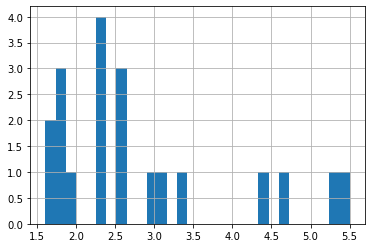

In [76]:
import numpy as np
yelp_df['review_count'].apply(np.log).hist(bins=30)